# OUR TARGET FROM THE PROJECT 

# **Predicting the damage grades of earthquake ?**:






---





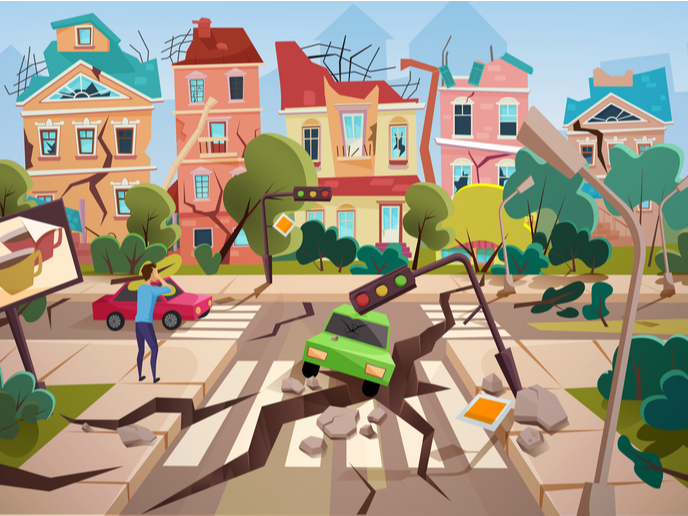

## **Table of content:**: 
  

*   Data Overview.
*   Importing Libraries. 


*   Data cleaning & preprocessing 
*   EDA:
      

      1.   univariate analysis.
      2.   Bivariate analysis.
      3.   multivariate analysis.


*   Data Encoding 
*   Data scaling


*   Data modeling 
*   Model evaluation 


*   pipeline





*   Deployment















# **Data overview**

Data talks about earth quakes happend in Nepal scince 2015 and its impact and  grades of damage on buildings and people ,it contains of 2 csv files:




 1- building_structure.csv           
          

>  762106 entries,30 columns



 2-household_demographics.csv         
        

> 747365 entries,12 columns





 
  



# **IT is supervised Machine learning problem (( Classification ))**

# **Importing libraries and modules needed**


In [1]:
# EDA Packages 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import missingno as msno
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Preprocessing 
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler

# Data Modeling 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Deployment  
import joblib 

# Settings 
sns.set(rc={'figure.figsize':[15,8]},font_scale=2)

In [2]:
!pip install datasist
from datasist.structdata import detect_outliers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.7 MB/s eta 0:00:00


## **Loading datasets**

In [3]:
building_structure = pd.read_csv('/content/drive/MyDrive/archive/csv_building_structure.csv',index_col='district_id')

In [4]:
household_demographics = pd.read_csv('/content/drive/MyDrive/archive/csv_household_demographics.csv',index_col='district_id')

# Assessing data 

# Exploring (building_structure.csv)

In [5]:
building_structure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 12 to 36
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   vdcmun_id                               762106 non-null  int64 
 2   ward_id                                 762106 non-null  int64 
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                         762106 non-null  ob

# Detecting  missing values

In [6]:
building_structure.isna().sum()

building_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_supers

In [7]:
building_structure.dropna(inplace=True)

In [8]:
building_structure.isna().sum()

building_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

Exploring the features

In [9]:
building_structure.sample(5)

,building_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
district_id,,,,,,,,,,,,,,,,,,,,,
28,282409000891,2813,281306,2,2,15,140,15,15,Flat,...,0,0,0,0,0,0,0,Damaged-Not used,Grade 4,Reconstruction
30,301701001351,3007,300701,1,0,6,230,8,0,Flat,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
31,312005060311,3104,310405,2,2,5,990,18,18,Flat,...,0,1,0,0,0,0,0,Not damaged,Grade 1,No need
24,247101000191,2405,240501,2,2,7,594,14,14,Flat,...,1,0,0,0,0,0,0,Damaged-Not used,Grade 3,Reconstruction
31,312011040131,3104,310411,1,1,19,425,9,9,Flat,...,0,1,0,0,0,0,0,Damaged-Used in risk,Grade 3,Minor repair


# Drop unnessecary columns from building_structure dataframe 

In [10]:
building_structure.drop(columns=['building_id','vdcmun_id','ward_id','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
                                 'has_superstructure_rc_engineered','has_superstructure_other',
                                 'roof_type','other_floor_type','position','ground_floor_type',
                                 'has_superstructure_bamboo','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_timber',
                                 'has_superstructure_mud_mortar_stone','condition_post_eq',
                                 'has_superstructure_adobe_mud','has_superstructure_rc_non_engineered','plinth_area_sq_ft'],inplace=True)

In [11]:
building_structure.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,plan_configuration,damage_grade,technical_solution_proposed
district_id,,,,,,,,,,
12,1,1,9,9,9,Flat,Other,Rectangular,Grade 3,Major repair
12,1,1,15,9,9,Flat,Other,Rectangular,Grade 5,Reconstruction
12,1,1,20,9,9,Flat,Other,Rectangular,Grade 2,Minor repair
12,1,1,20,9,9,Flat,Other,Rectangular,Grade 2,Minor repair
12,1,1,30,9,9,Flat,Other,Rectangular,Grade 1,Minor repair


The building age is the only feature that has outliers 

In [12]:
building_structure.describe()

,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq
count,762094.000,762094.000,762094.000,762094.000,762094.000
mean,2.088,1.252,24.325,16.049,9.869
std,0.655,1.063,65.035,5.494,8.574
min,1.000,0.000,0.000,6.000,0.000
25%,2.000,0.000,9.000,12.000,0.000
50%,2.000,1.000,16.000,16.000,11.000
75%,2.000,2.000,27.000,18.000,16.000
max,9.000,9.000,999.000,99.000,99.000


The correlation between (count_floors_pre_eq and height_ft_pre_eq)
                        (count_floors_post_eq and height_ft_post_eq)


In [13]:
building_structure.corr()

,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq
count_floors_pre_eq,1.000,0.264,0.047,0.711,0.191
count_floors_post_eq,0.264,1.000,-0.004,0.262,0.938
age_building,0.047,-0.004,1.000,0.036,-0.007
height_ft_pre_eq,0.711,0.262,0.036,1.000,0.375
height_ft_post_eq,0.191,0.938,-0.007,0.375,1.000


In [14]:
building_structure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 12 to 36
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   count_floors_pre_eq          762094 non-null  int64 
 1   count_floors_post_eq         762094 non-null  int64 
 2   age_building                 762094 non-null  int64 
 3   height_ft_pre_eq             762094 non-null  int64 
 4   height_ft_post_eq            762094 non-null  int64 
 5   land_surface_condition       762094 non-null  object
 6   foundation_type              762094 non-null  object
 7   plan_configuration           762094 non-null  object
 8   damage_grade                 762094 non-null  object
 9   technical_solution_proposed  762094 non-null  object
dtypes: int64(5), object(5)
memory usage: 64.0+ MB


# **Univariate analysis**

In [15]:
building_structure['land_surface_condition'].value_counts()

Flat              631663
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [16]:
building_structure['foundation_type'].value_counts()

Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [17]:
building_structure['plan_configuration'].value_counts()

Rectangular                        731246
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [18]:
building_structure['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

In [19]:
building_structure.groupby('damage_grade').max()

,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,plan_configuration,technical_solution_proposed
damage_grade,,,,,,,,,
Grade 1,9,9,999,99,99,Steep slope,RC,U-shape,Reconstruction
Grade 2,9,9,999,96,97,Steep slope,RC,U-shape,Reconstruction
Grade 3,9,9,999,99,99,Steep slope,RC,U-shape,Reconstruction
Grade 4,9,9,999,99,81,Steep slope,RC,U-shape,Reconstruction
Grade 5,9,9,999,99,75,Steep slope,RC,U-shape,Reconstruction


In [20]:
building_structure['technical_solution_proposed'].value_counts()

Reconstruction    470219
Major repair      129415
Minor repair      110605
No need            51855
Name: technical_solution_proposed, dtype: int64

# Exploring (household_demographics.csv)

In [21]:
household_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747365 entries, 12 to 36
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   household_id                          747365 non-null  int64  
 1   vdcmun_id                             747365 non-null  int64  
 2   ward_id                               747365 non-null  int64  
 3   gender_household_head                 747363 non-null  object 
 4   age_household_head                    747363 non-null  float64
 5   caste_household                       747137 non-null  object 
 6   education_level_household_head        747137 non-null  object 
 7   income_level_household                747137 non-null  object 
 8   size_household                        747363 non-null  float64
 9   is_bank_account_present_in_household  747137 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.7+ MB


In [22]:
household_demographics.isna().sum()

household_id                              0
vdcmun_id                                 0
ward_id                                   0
gender_household_head                     2
age_household_head                        2
caste_household                         228
education_level_household_head          228
income_level_household                  228
size_household                            2
is_bank_account_present_in_household    228
dtype: int64

# cleaning  (household_demographics.csv)

In [23]:
household_demographics.drop(columns=['household_id','vdcmun_id','caste_household','ward_id','size_household'],inplace=True)

In [24]:
household_demographics.dropna(inplace=True)

In [25]:
household_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747137 entries, 12 to 36
Data columns (total 5 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   gender_household_head                 747137 non-null  object 
 1   age_household_head                    747137 non-null  float64
 2   education_level_household_head        747137 non-null  object 
 3   income_level_household                747137 non-null  object 
 4   is_bank_account_present_in_household  747137 non-null  float64
dtypes: float64(2), object(3)
memory usage: 34.2+ MB


# univarate analysis

In [26]:
household_demographics['gender_household_head'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
household_demographics['age_household_head'].unique()

array([ 31.,  62.,  51.,  48.,  70.,  52.,  27.,  44.,  34.,  35.,  38.,
        46.,  49.,  63.,  71.,  84.,  59.,  55.,  61.,  57.,  43.,  65.,
        50.,  32.,  58.,  54.,  60.,  42.,  74.,  41.,  53.,  69.,  56.,
        37.,  73.,  30.,  45.,  87.,  82.,  78.,  25.,  81.,  28.,  29.,
        80.,  64.,  36.,  90.,  33.,  24.,  20.,  40.,  39.,  72.,  79.,
        67.,  75.,  22.,  47.,  66.,  76.,  19.,  26.,  68.,  23.,  21.,
        85.,  89.,  77.,  83.,  18.,  88.,  16.,  17.,  15.,  86.,  11.,
        14.,  13.,  99.,  95.,  91.,  93.,  12.,  96., 112.,  97., 100.,
        92.,  94., 110., 114.,  10., 101., 107., 120., 106., 109.,  98.,
       103., 104., 115., 102., 119., 117., 105., 122.])

In [28]:
household_demographics['education_level_household_head'].unique()

array(['Illiterate', 'Class 5', 'Class 4', 'SLC or equivalent',
       'Class 10', 'Class 9', 'Non-formal education',
       'Intermediate or equivalent', 'Class 7', 'Class 2', 'Class 1',
       'Class 8', 'Class 3', 'Class 6', 'Bachelors or equivalent',
       'Other', 'Masters or equivalent', 'Nursery/K.G./Kindergarten',
       'Ph.D. or equivalent'], dtype=object)

In [29]:
household_demographics['income_level_household'].unique()

array(['Rs. 10 thousand', 'Rs. 10-20 thousand', 'Rs. 20-30 thousand',
       'Rs. 30-50 thousand', 'Rs. 50 thousand or more'], dtype=object)

In [30]:
household_demographics['is_bank_account_present_in_household'].unique()

array([0., 1.])

# **Concatenate 2 csv files in to 1 data frame **

In [31]:
final_df=pd.concat([household_demographics.reset_index(),building_structure.reset_index()
],axis=1)
final_df.head(5)

,district_id,gender_household_head,age_household_head,education_level_household_head,income_level_household,is_bank_account_present_in_household,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,plan_configuration,damage_grade,technical_solution_proposed
0,12.000,Male,31.000,Illiterate,Rs. 10 thousand,0.000,12,1,1,9,9,9,Flat,Other,Rectangular,Grade 3,Major repair
1,12.000,Female,62.000,Illiterate,Rs. 10 thousand,0.000,12,1,1,15,9,9,Flat,Other,Rectangular,Grade 5,Reconstruction
2,12.000,Male,51.000,Illiterate,Rs. 10 thousand,0.000,12,1,1,20,9,9,Flat,Other,Rectangular,Grade 2,Minor repair
3,12.000,Male,48.000,Illiterate,Rs. 10 thousand,0.000,12,1,1,20,9,9,Flat,Other,Rectangular,Grade 2,Minor repair
4,12.000,Male,70.000,Illiterate,Rs. 10 thousand,0.000,12,1,1,30,9,9,Flat,Other,Rectangular,Grade 1,Minor repair


In [32]:
final_df.to_csv('final_df_deployment3.csv')

In [33]:
df_pipeline=pd.read_csv('/content/final_df_deployment3.csv',index_col='Unnamed: 0')

<ipython-input-33-47d31094e2e3>:1: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pipeline=pd.read_csv('/content/final_df_deployment3.csv',index_col='Unnamed: 0')


# Explore the final dataframe and start preprossessing

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762093
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   district_id                           747137 non-null  float64
 1   gender_household_head                 747137 non-null  object 
 2   age_household_head                    747137 non-null  float64
 3   education_level_household_head        747137 non-null  object 
 4   income_level_household                747137 non-null  object 
 5   is_bank_account_present_in_household  747137 non-null  float64
 6   district_id                           762094 non-null  int64  
 7   count_floors_pre_eq                   762094 non-null  int64  
 8   count_floors_post_eq                  762094 non-null  int64  
 9   age_building                          762094 non-null  int64  
 10  height_ft_pre_eq                      762094 non-null  int64  
 11  

In [35]:
final_df.describe()

,district_id,age_household_head,is_bank_account_present_in_household,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq
count,747137.000,747137.000,747137.000,762094.000,762094.000,762094.000,762094.000,762094.000,762094.000
mean,25.768,46.630,0.197,25.768,2.088,1.252,24.325,16.049,9.869
std,5.744,15.072,0.397,5.808,0.655,1.063,65.035,5.494,8.574
min,12.000,10.000,0.000,12.000,1.000,0.000,0.000,6.000,0.000
25%,22.000,34.000,0.000,22.000,2.000,0.000,9.000,12.000,0.000
50%,24.000,46.000,0.000,24.000,2.000,1.000,16.000,16.000,11.000
75%,30.000,57.000,0.000,30.000,2.000,2.000,27.000,18.000,16.000
max,36.000,122.000,1.000,36.000,9.000,9.000,999.000,99.000,99.000


In [36]:
df_2 = final_df.copy()

In [37]:
final_df.duplicated().sum()

17314

In [38]:
final_df.drop_duplicates(inplace=True)

In [39]:
final_df.isna().sum()

district_id                             6238
gender_household_head                   6238
age_household_head                      6238
education_level_household_head          6238
income_level_household                  6238
is_bank_account_present_in_household    6238
district_id                                0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
plan_configuration                         0
damage_grade                               0
technical_solution_proposed                0
dtype: int64

handeling missing values

In [40]:
final_df.dropna(inplace=True)

In [41]:
final_df.drop_duplicates(inplace=True)

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738542 entries, 0 to 747136
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   district_id                           738542 non-null  float64
 1   gender_household_head                 738542 non-null  object 
 2   age_household_head                    738542 non-null  float64
 3   education_level_household_head        738542 non-null  object 
 4   income_level_household                738542 non-null  object 
 5   is_bank_account_present_in_household  738542 non-null  float64
 6   district_id                           738542 non-null  int64  
 7   count_floors_pre_eq                   738542 non-null  int64  
 8   count_floors_post_eq                  738542 non-null  int64  
 9   age_building                          738542 non-null  int64  
 10  height_ft_pre_eq                      738542 non-null  int64  
 11  

# Handling categorical data

In [43]:
categorical_columns = final_df.select_dtypes(include='object')
categorical_columns

,gender_household_head,education_level_household_head,income_level_household,land_surface_condition,foundation_type,plan_configuration,damage_grade,technical_solution_proposed
0,Male,Illiterate,Rs. 10 thousand,Flat,Other,Rectangular,Grade 3,Major repair
1,Female,Illiterate,Rs. 10 thousand,Flat,Other,Rectangular,Grade 5,Reconstruction
2,Male,Illiterate,Rs. 10 thousand,Flat,Other,Rectangular,Grade 2,Minor repair
3,Male,Illiterate,Rs. 10 thousand,Flat,Other,Rectangular,Grade 2,Minor repair
4,Male,Illiterate,Rs. 10 thousand,Flat,Other,Rectangular,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...
747132,Female,Illiterate,Rs. 10 thousand,Flat,Mud mortar-Stone/Brick,Rectangular,Grade 5,Reconstruction
747133,Male,Class 10,Rs. 10 thousand,Flat,Mud mortar-Stone/Brick,Rectangular,Grade 5,Reconstruction
747134,Male,Class 5,Rs. 10 thousand,Flat,Mud mortar-Stone/Brick,Rectangular,Grade 5,Reconstruction
747135,Female,Illiterate,Rs. 10 thousand,Moderate slope,Mud mortar-Stone/Brick,Rectangular,Grade 5,Reconstruction


In [44]:
final_df['gender_household_head'].value_counts()

Male      501059
Female    237483
Name: gender_household_head, dtype: int64

In [45]:
final_df['education_level_household_head'].value_counts()

Illiterate                    257190
Non-formal education          155971
Class 5                        45046
SLC or equivalent              42846
Intermediate or equivalent     29116
Class 4                        27747
Class 8                        27465
Class 3                        26153
Class 10                       24056
Class 2                        22266
Class 7                        21402
Class 6                        17069
Class 9                        12172
Bachelors or equivalent        10913
Class 1                         9988
Masters or equivalent           4504
Other                           2833
Nursery/K.G./Kindergarten       1736
Ph.D. or equivalent               69
Name: education_level_household_head, dtype: int64

In [46]:
def education(x):
  if x in ['Ph.D. or equivalent','Masters or equivalent','SLC or equivalent']:
     return 'Bachelors or equivalent'
  elif x in ['Nursery/K.G./Kindergarten','Class 1','Class 2','Class 3','Class 4','Class 6',
             'Class 7','Non-formal education','Class 10','Class 8','Class 5']: 
       return 'Intermediate or equivalent'
  else:
      return 'Illiterate'
    

In [47]:
final_df['education_level_household_head'].apply(education)

0                         Illiterate
1                         Illiterate
2                         Illiterate
3                         Illiterate
4                         Illiterate
                     ...            
747132                    Illiterate
747133    Intermediate or equivalent
747134    Intermediate or equivalent
747135                    Illiterate
747136                    Illiterate
Name: education_level_household_head, Length: 738542, dtype: object

In [48]:
final_df['education_level_household_head'].value_counts()

Illiterate                    257190
Non-formal education          155971
Class 5                        45046
SLC or equivalent              42846
Intermediate or equivalent     29116
Class 4                        27747
Class 8                        27465
Class 3                        26153
Class 10                       24056
Class 2                        22266
Class 7                        21402
Class 6                        17069
Class 9                        12172
Bachelors or equivalent        10913
Class 1                         9988
Masters or equivalent           4504
Other                           2833
Nursery/K.G./Kindergarten       1736
Ph.D. or equivalent               69
Name: education_level_household_head, dtype: int64

In [49]:
final_df['income_level_household'].value_counts()

Rs. 10 thousand            401968
Rs. 10-20 thousand         230367
Rs. 20-30 thousand          75997
Rs. 30-50 thousand          21934
Rs. 50 thousand or more      8276
Name: income_level_household, dtype: int64

In [50]:
final_df['income_level_household'] = final_df['income_level_household'].apply(lambda x:x.split('.')[1])

In [51]:
final_df['income_level_household'] = final_df['income_level_household'].apply(lambda x:x.split(' or')[0])

In [52]:
final_df['income_level_household'] = final_df['income_level_household'].apply(lambda x:x.replace(' thousand',''))

In [53]:
final_df['income_level_household'] = final_df['income_level_household'].apply(lambda x:x.split('-')[0])

In [54]:
final_df['income_level_household'].value_counts()

 10    632335
 20     75997
 30     21934
 50      8276
Name: income_level_household, dtype: int64

In [55]:
final_df['land_surface_condition'].value_counts()

Flat              610322
Moderate slope    103693
Steep slope        24527
Name: land_surface_condition, dtype: int64

In [56]:
final_df['foundation_type'].value_counts()

Mud mortar-Stone/Brick    606602
Bamboo/Timber              56958
Cement-Stone/Brick         38670
RC                         31787
Other                       4525
Name: foundation_type, dtype: int64

In [57]:
def foundation(x):
  if x in ['Mud mortar-Stone/Brick','Cement-Stone/Brick']:
    return 'Brick'
  elif x in ['Bamboo/Timber']:
    return 'Bamboo'
  else:
    return 'Rc'

In [58]:
final_df['foundation_type'] = final_df['foundation_type'].apply(foundation)

In [59]:
final_df['foundation_type'].value_counts()

Brick     645272
Bamboo     56958
Rc         36312
Name: foundation_type, dtype: int64

In [60]:
final_df['plan_configuration'].value_counts()

Rectangular                        708302
Square                              17084
L-shape                             10004
T-shape                               956
Multi-projected                       934
Others                                510
U-shape                               438
E-shape                               137
Building with Central Courtyard        97
H-shape                                80
Name: plan_configuration, dtype: int64

In [61]:
def shape(x):
  if x in ['H-shape','E-shape']:
    return 'Rectangular'
  elif x in ['Others','Multi-projected','Building with Central Courtyard','U-shape']:
    return 'Square'
  elif x in ['L-shape','T-shape']:
    return 'T-shape'
  else:
    return x

In [62]:
final_df['plan_configuration'] = final_df['plan_configuration'].apply(shape)

In [63]:
final_df['plan_configuration'].value_counts()

Rectangular    708519
Square          19063
T-shape         10960
Name: plan_configuration, dtype: int64

In [64]:
final_df['damage_grade'].value_counts()

Grade 5    262925
Grade 4    178888
Grade 3    133234
Grade 2     85563
Grade 1     77932
Name: damage_grade, dtype: int64

In [65]:
final_df['technical_solution_proposed'].value_counts()

Reconstruction    451981
Major repair      126453
Minor repair      108838
No need            51270
Name: technical_solution_proposed, dtype: int64

# Handling numerical Data

In [66]:
numeric_columns = final_df.select_dtypes(exclude='object')

In [67]:
final_df.columns

Index(['district_id', 'gender_household_head', 'age_household_head',
       'education_level_household_head', 'income_level_household',
       'is_bank_account_present_in_household', 'district_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'plan_configuration', 'damage_grade',
       'technical_solution_proposed'],
      dtype='object')

In [68]:
final_df.head(5)

,district_id,gender_household_head,age_household_head,education_level_household_head,income_level_household,is_bank_account_present_in_household,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,plan_configuration,damage_grade,technical_solution_proposed
0,12.000,Male,31.000,Illiterate,10,0.000,12,1,1,9,9,9,Flat,Rc,Rectangular,Grade 3,Major repair
1,12.000,Female,62.000,Illiterate,10,0.000,12,1,1,15,9,9,Flat,Rc,Rectangular,Grade 5,Reconstruction
2,12.000,Male,51.000,Illiterate,10,0.000,12,1,1,20,9,9,Flat,Rc,Rectangular,Grade 2,Minor repair
3,12.000,Male,48.000,Illiterate,10,0.000,12,1,1,20,9,9,Flat,Rc,Rectangular,Grade 2,Minor repair
4,12.000,Male,70.000,Illiterate,10,0.000,12,1,1,30,9,9,Flat,Rc,Rectangular,Grade 1,Minor repair


In [69]:
final_df.drop(columns=['district_id'],inplace=True)

In [70]:
final_df.rename(columns={'income_level_household':'income','technical_solution_proposed':'tec_solution','age_household_head':'age','education_level_household_head':'edu_level',
                         'count_floors_pre_eq':'no_floors_pre','count_floors_post_eq':'no_floor_post','is_bank_account_present_in_household':'bank_acc'},inplace=True)

In [71]:
final_df['income'].value_counts()

 10    632335
 20     75997
 30     21934
 50      8276
Name: income, dtype: int64

In [72]:
final_df['tec_solution'].value_counts()

Reconstruction    451981
Major repair      126453
Minor repair      108838
No need            51270
Name: tec_solution, dtype: int64

In [73]:
final_df['height_ft_pre_eq'].value_counts()

18    98949
14    90457
12    78555
16    71978
15    57285
      ...  
97        1
93        1
59        1
89        1
61        1
Name: height_ft_pre_eq, Length: 79, dtype: int64

In [74]:
def height(x):
  if (x>=40):
    return 50
  elif (29<= x<40):
    return 
  else :
    return x

In [75]:
final_df['height_ft_post_eq'].value_counts()

0     248808
14     53651
18     52699
12     48479
16     42936
       ...  
97         1
78         1
90         1
73         1
96         1
Name: height_ft_post_eq, Length: 79, dtype: int64

In [76]:
def height_post(x):
  if (41<=x<=99):
    return 40
  elif (23<=x<=40):
    return 40
  else:
    return x

In [77]:
final_df['height_ft_post_eq'] = final_df['height_ft_post_eq'].apply(height_post)

In [78]:
final_df['height_ft_post_eq'].value_counts()

0     248808
14     53651
18     52699
12     48479
16     42936
40     37963
15     34140
20     30148
10     25574
7      24771
8      24075
9      21516
6      18641
17     17112
13     15715
21     14368
22     11882
11      9380
19      6684
Name: height_ft_post_eq, dtype: int64

In [79]:
final_df['height_ft_pre_eq'] = final_df['height_ft_pre_eq'].apply(height)

handeling nan values 

In [80]:
final_df['height_ft_pre_eq'].unique()

array([ 9., 21., 19., 12., 15., 17.,  7., 16., 14.,  6., 10., 24., 18.,
       20.,  8., nan, 22., 27., 11., 13., 25., 23., 26., 28., 50.])

In [81]:
final_df['height_ft_pre_eq'].median()

16.0

In [82]:
final_df['height_ft_pre_eq'].fillna(final_df['height_ft_pre_eq'].median(),inplace=True)

In [83]:
final_df['height_ft_pre_eq'].unique()

array([ 9., 21., 19., 12., 15., 17.,  7., 16., 14.,  6., 10., 24., 18.,
       20.,  8., 22., 27., 11., 13., 25., 23., 26., 28., 50.])

In [84]:
final_df['height_ft_pre_eq'].value_counts()

18.000    98949
14.000    90457
16.000    83040
12.000    78555
15.000    57285
20.000    49353
21.000    36632
10.000    29135
17.000    28219
13.000    23743
9.000     21501
8.000     20948
22.000    20107
24.000    19545
7.000     17018
19.000    12020
25.000    11079
11.000    11016
6.000      9394
27.000     7878
23.000     5530
50.000     3506
28.000     2091
26.000     1541
Name: height_ft_pre_eq, dtype: int64

In [85]:
final_df['no_floors_pre'].value_counts()

2    450444
3    163746
1    116266
4      6074
5      1568
6       331
7        88
9        13
8        12
Name: no_floors_pre, dtype: int64

In [86]:
def no_floors(x):
  if (x>=4):
    return 4
  else :
    return x  

In [87]:
final_df['no_floors_pre'] = final_df['no_floors_pre'].apply(no_floors)
final_df['no_floors_pre'].value_counts()

2    450444
3    163746
1    116266
4      8086
Name: no_floors_pre, dtype: int64

In [88]:
final_df['no_floor_post'].value_counts()

2    285581
0    248808
1    129578
3     67797
4      4832
5      1494
6       322
7        92
8        20
9        18
Name: no_floor_post, dtype: int64

In [89]:
final_df['no_floor_post'] =final_df['no_floor_post'].apply(no_floors)
final_df['no_floor_post'].value_counts()

2    285581
0    248808
1    129578
3     67797
4      6778
Name: no_floor_post, dtype: int64

In [90]:
final_df['age'].value_counts()

44.000     20041
32.000     18221
46.000     18157
47.000     18088
34.000     17853
           ...  
114.000        1
110.000        1
119.000        1
112.000        1
122.000        1
Name: age, Length: 107, dtype: int64

In [91]:
houses_age_more_100 = final_df[final_df['age']>100]
houses_age_more_100

,gender_household_head,age,edu_level,income,bank_acc,no_floors_pre,no_floor_post,age_building,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,plan_configuration,damage_grade,tec_solution
17828,Male,112.000,Masters or equivalent,10,1.000,1,1,40,6.000,6,Flat,Brick,Rectangular,Grade 2,Minor repair
27345,Female,110.000,Illiterate,10,0.000,2,2,15,17.000,17,Flat,Brick,Rectangular,Grade 2,Minor repair
29851,Male,114.000,Illiterate,10,0.000,1,1,45,6.000,6,Moderate slope,Brick,Rectangular,Grade 3,Major repair
42074,Female,101.000,Illiterate,10,1.000,2,2,27,12.000,12,Moderate slope,Bamboo,Rectangular,Grade 4,Reconstruction
46326,Male,107.000,Non-formal education,10,0.000,2,2,40,13.000,13,Moderate slope,Brick,Rectangular,Grade 4,Reconstruction
88702,Male,120.000,Illiterate,10,0.000,2,2,16,19.000,19,Flat,Brick,Rectangular,Grade 3,Major repair
93148,Male,101.000,Illiterate,10,1.000,2,2,82,16.000,16,Flat,Brick,Rectangular,Grade 2,Reconstruction
117497,Female,107.000,Illiterate,10,0.000,3,3,30,20.000,20,Moderate slope,Brick,Rectangular,Grade 3,Major repair
124865,Male,106.000,Illiterate,10,0.000,3,0,9,17.000,0,Flat,Brick,Rectangular,Grade 5,Reconstruction
133927,Male,109.000,Illiterate,10,0.000,2,2,30,18.000,18,Steep slope,Brick,Rectangular,Grade 4,Reconstruction


In [92]:
final_df['age'] = final_df['age'].astype(int)

In [93]:
def household_age(x):
  
    if (x >= 90):
        return 150
    elif (70<= x <= 90):
        return 80
    elif (40<= x <= 50):
        return 50
    elif (30 <= x <= 40):
        return 35
    else:
      return 20


In [94]:
final_df['age'] = final_df['age'].apply(household_age)

In [95]:
final_df['age'].value_counts()

20     325904
50     185440
35     167331
80      58502
150      1365
Name: age, dtype: int64

In [96]:
final_df['bank_acc'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
747132    0
747133    0
747134    0
747135    0
747136    0
Name: bank_acc, Length: 738542, dtype: int64

In [97]:
final_df['bank_acc'].value_counts()

0.000    591844
1.000    146698
Name: bank_acc, dtype: int64

Feature selection with variance method

In [98]:
final_df.rename(columns={'gender_household_head':'gender','age_household_head':'age','education_level_household_head':'edu_level',
                 'is_bank_account_present_in_household':'bank_acc','count_floors_pre_eq':'no_floors_pre','income_level_household':'income',
                 'count_floors_post_eq':'no_floor_post','technical_solution_proposed':'tec_solution'},inplace=True)

In [99]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738542 entries, 0 to 747136
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gender                  738542 non-null  object 
 1   age                     738542 non-null  int64  
 2   edu_level               738542 non-null  object 
 3   income                  738542 non-null  object 
 4   bank_acc                738542 non-null  float64
 5   no_floors_pre           738542 non-null  int64  
 6   no_floor_post           738542 non-null  int64  
 7   age_building            738542 non-null  int64  
 8   height_ft_pre_eq        738542 non-null  float64
 9   height_ft_post_eq       738542 non-null  int64  
 10  land_surface_condition  738542 non-null  object 
 11  foundation_type         738542 non-null  object 
 12  plan_configuration      738542 non-null  object 
 13  damage_grade            738542 non-null  object 
 14  tec_solution        

In [100]:
final_df.to_csv('final_df_pipeline_data.csv')

EDA Data visualization

In [101]:
final_df.groupby([ 'no_floors_pre','no_floor_post','damage_grade','foundation_type'])[['foundation_type']].count().sort_values(by='damage_grade',ascending=False)[1:51]

foundation_type
no_floors_pre no_floor_post damage_grade foundation_type                 
1             4             Grade 5      Brick                          1
3             1             Grade 5      Bamboo                         3
              0             Grade 5      Rc                           179
                                         Brick                      73201
                                         Bamboo                        63
1             0             Grade 5      Brick                      28885
2             3             Grade 5      Brick                          6
              2             Grade 5      Rc                            58
                                         Brick                       4783
                                         Bamboo                       166
              1             Grade 5      Rc                            46
                                         Brick                       3787
                                         Bamboo                        19
              0             Grade 5      Rc                          1221
                                         Brick                     139102
                                         Bamboo                      3350
3             1             Grade 5      Brick                       2141
                                         Rc                             4
              2             Grade 5      Brick                        652
4             1             Grade 5      Brick                         12
              4             Grade 5      Brick                         14
              3             Grade 5      Rc                             2
                                         Brick                          8
              2             Grade 5      Rc                             2
                                         Brick                         26
              1             Grade 5      Rc                             2
              0             Grade 5      Rc                            86
3             2             Grade 5      Rc                             3
4             0             Grade 5      Brick                        687
                                         Bamboo                         2
3             4             Grade 5      Brick                          1
              3             Grade 5      Rc                            10
                                         Brick                       1280
                                         Bamboo                         5
1             4             Grade 5      Rc                             1
4             4             Grade 5      Rc                             4
1             0             Grade 5      Rc                           474
              2             Grade 5      Brick                          1
                                         Bamboo                         1
              1             Grade 5      Bamboo                        87
                                         Brick                        950
                                         Rc                            42
3             1             Grade 4      Brick                       9501
2             2             Grade 4      Brick                      87134
              4             Grade 4      Bamboo                         1
4             2             Grade 4      Bamboo                         1
                                         Brick                        205
3             2             Grade 4      Rc                            35
                                         Brick                       6829
2             2             Grade 4      Bamboo                      6666

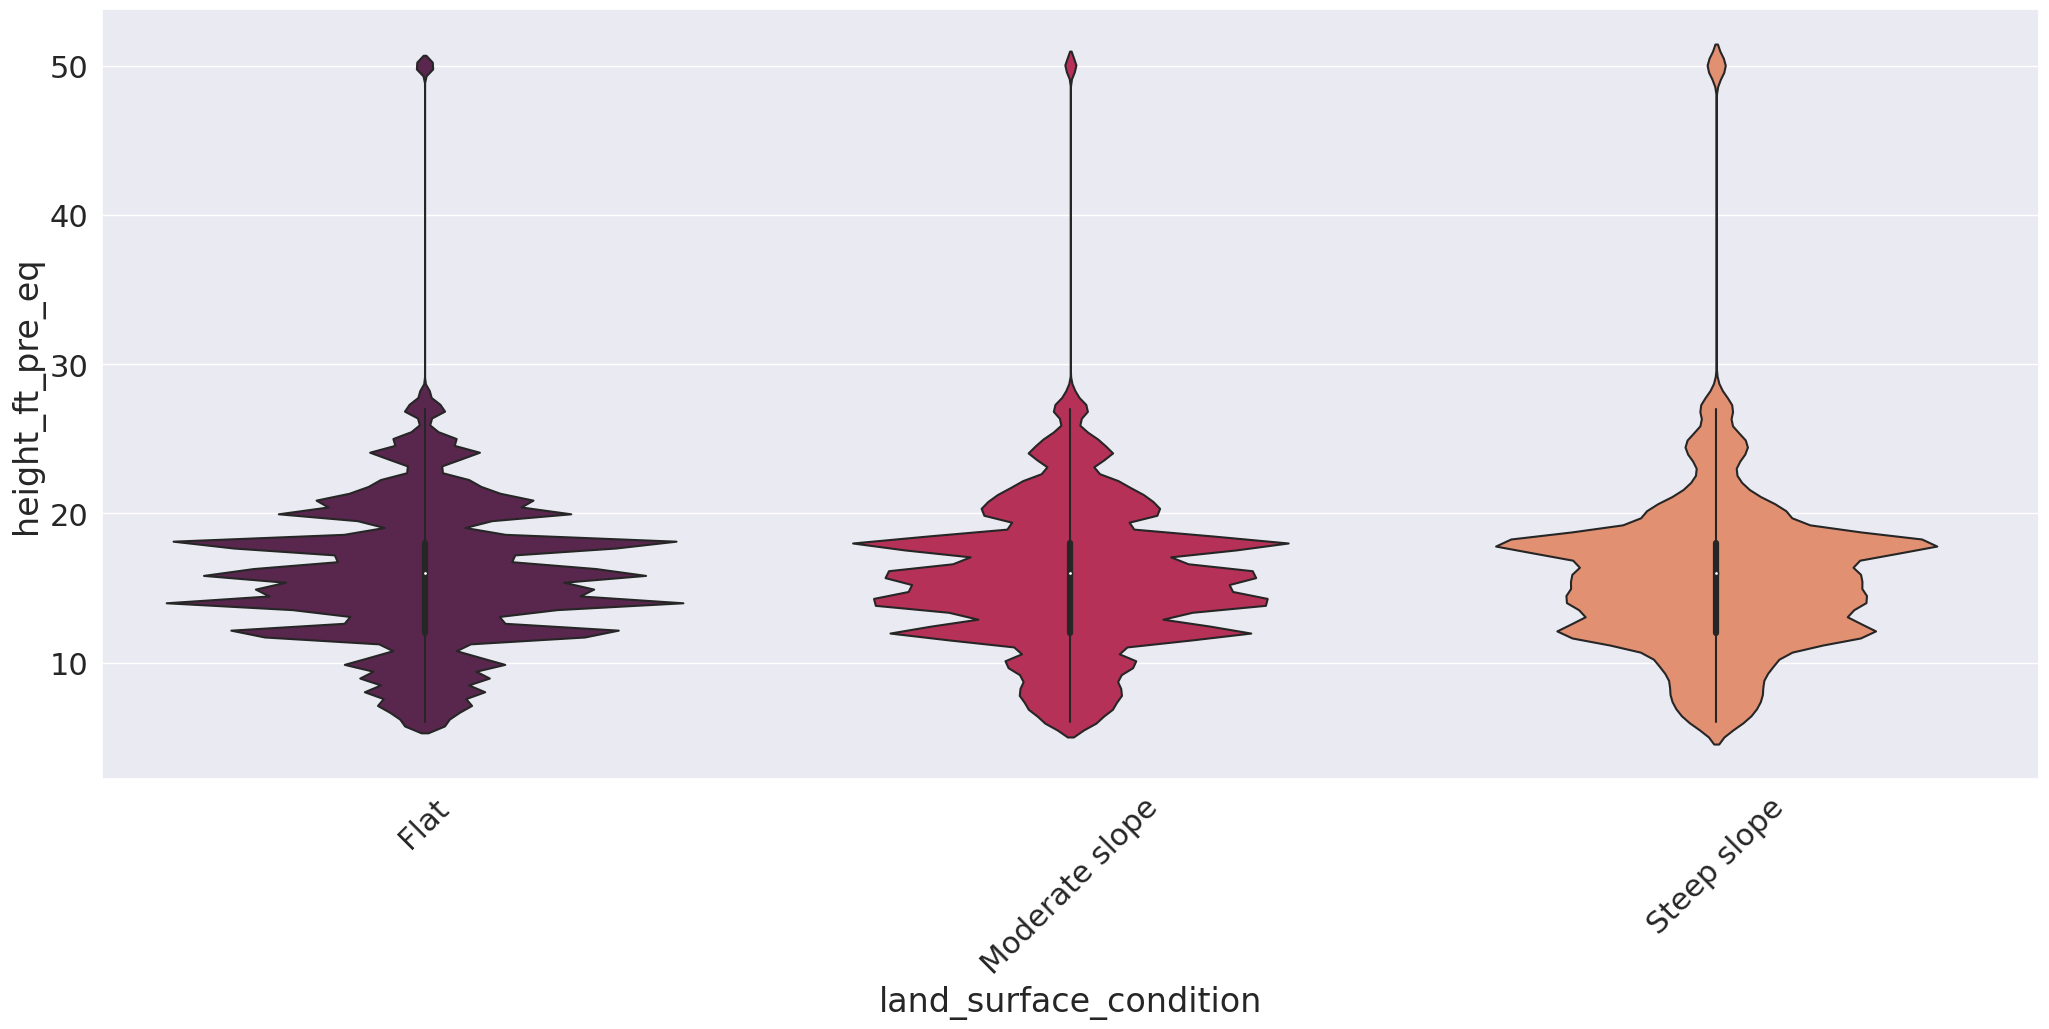

In [102]:
plt.figure(figsize=[25,10])
sns.violinplot(x='land_surface_condition',y='height_ft_pre_eq',data=final_df,palette='rocket')
plt.xticks(rotation=45)
plt.savefig('land_surface.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')

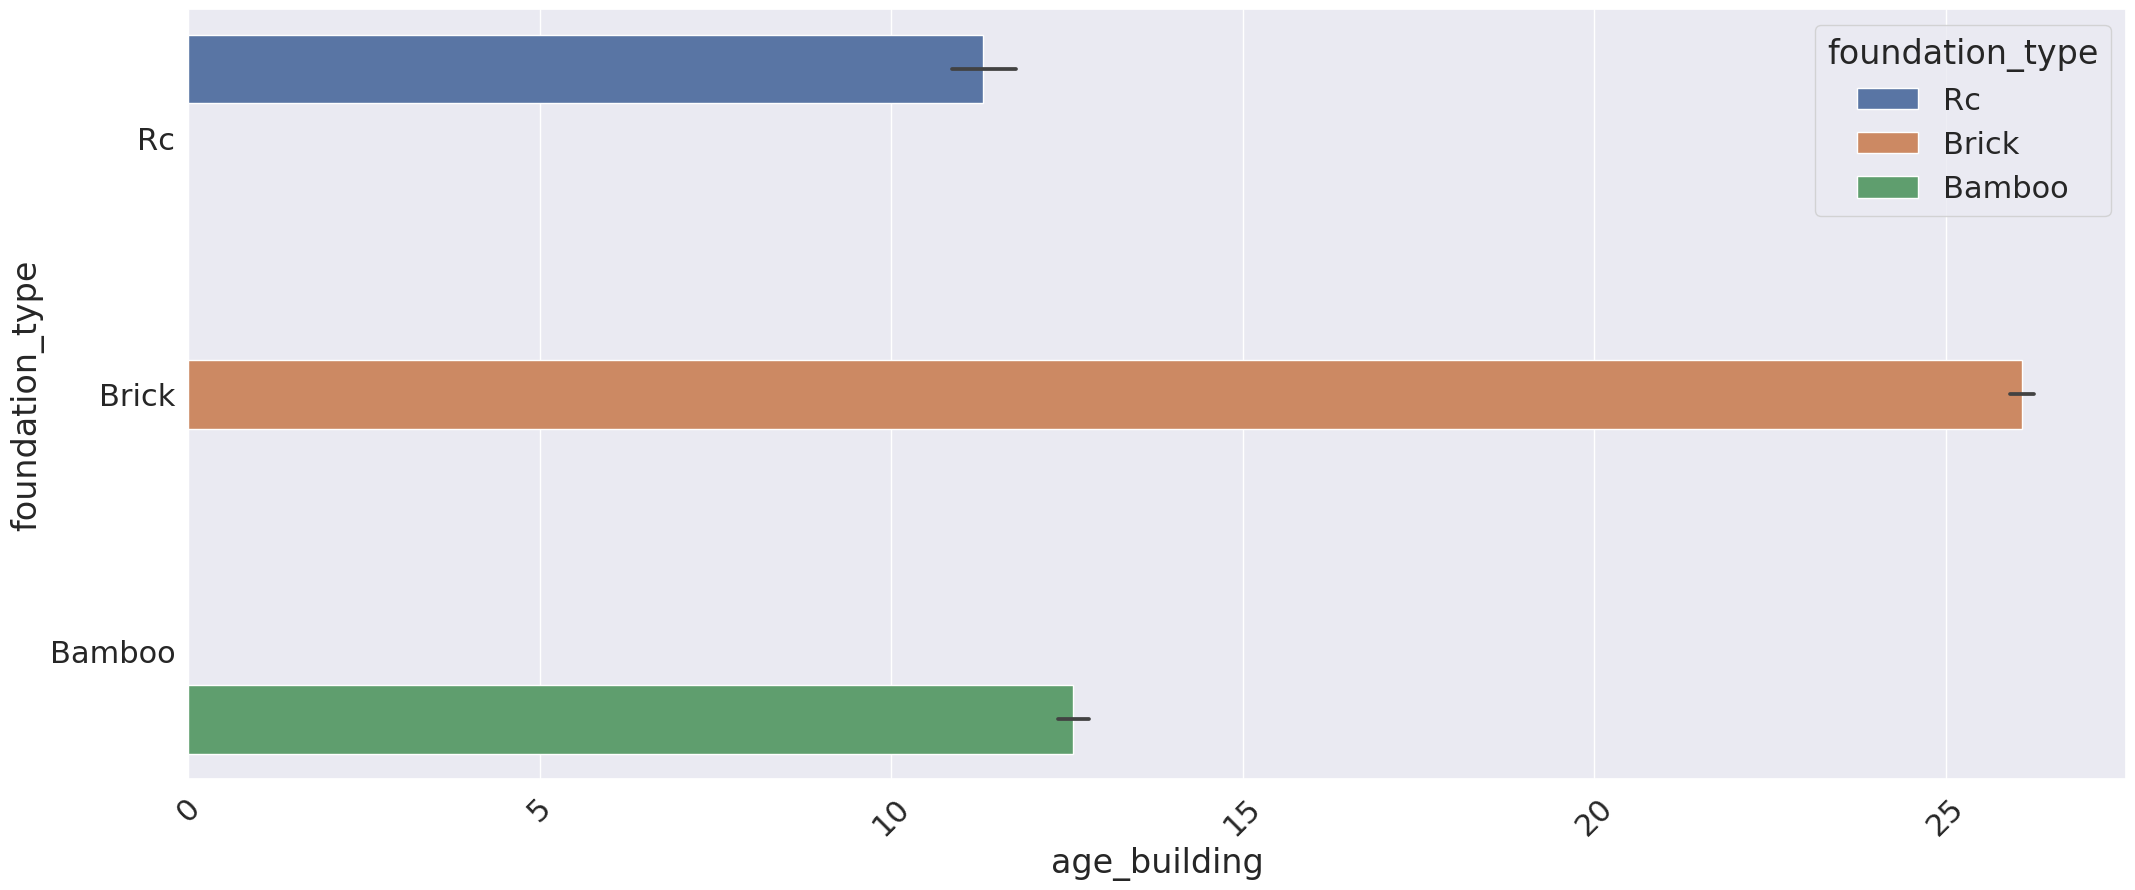

In [103]:
plt.figure(figsize=[25,10])
sns.barplot(x='age_building',y='foundation_type',data=final_df,hue='foundation_type')
plt.xticks(rotation=45)
plt.savefig('foundation_type.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')

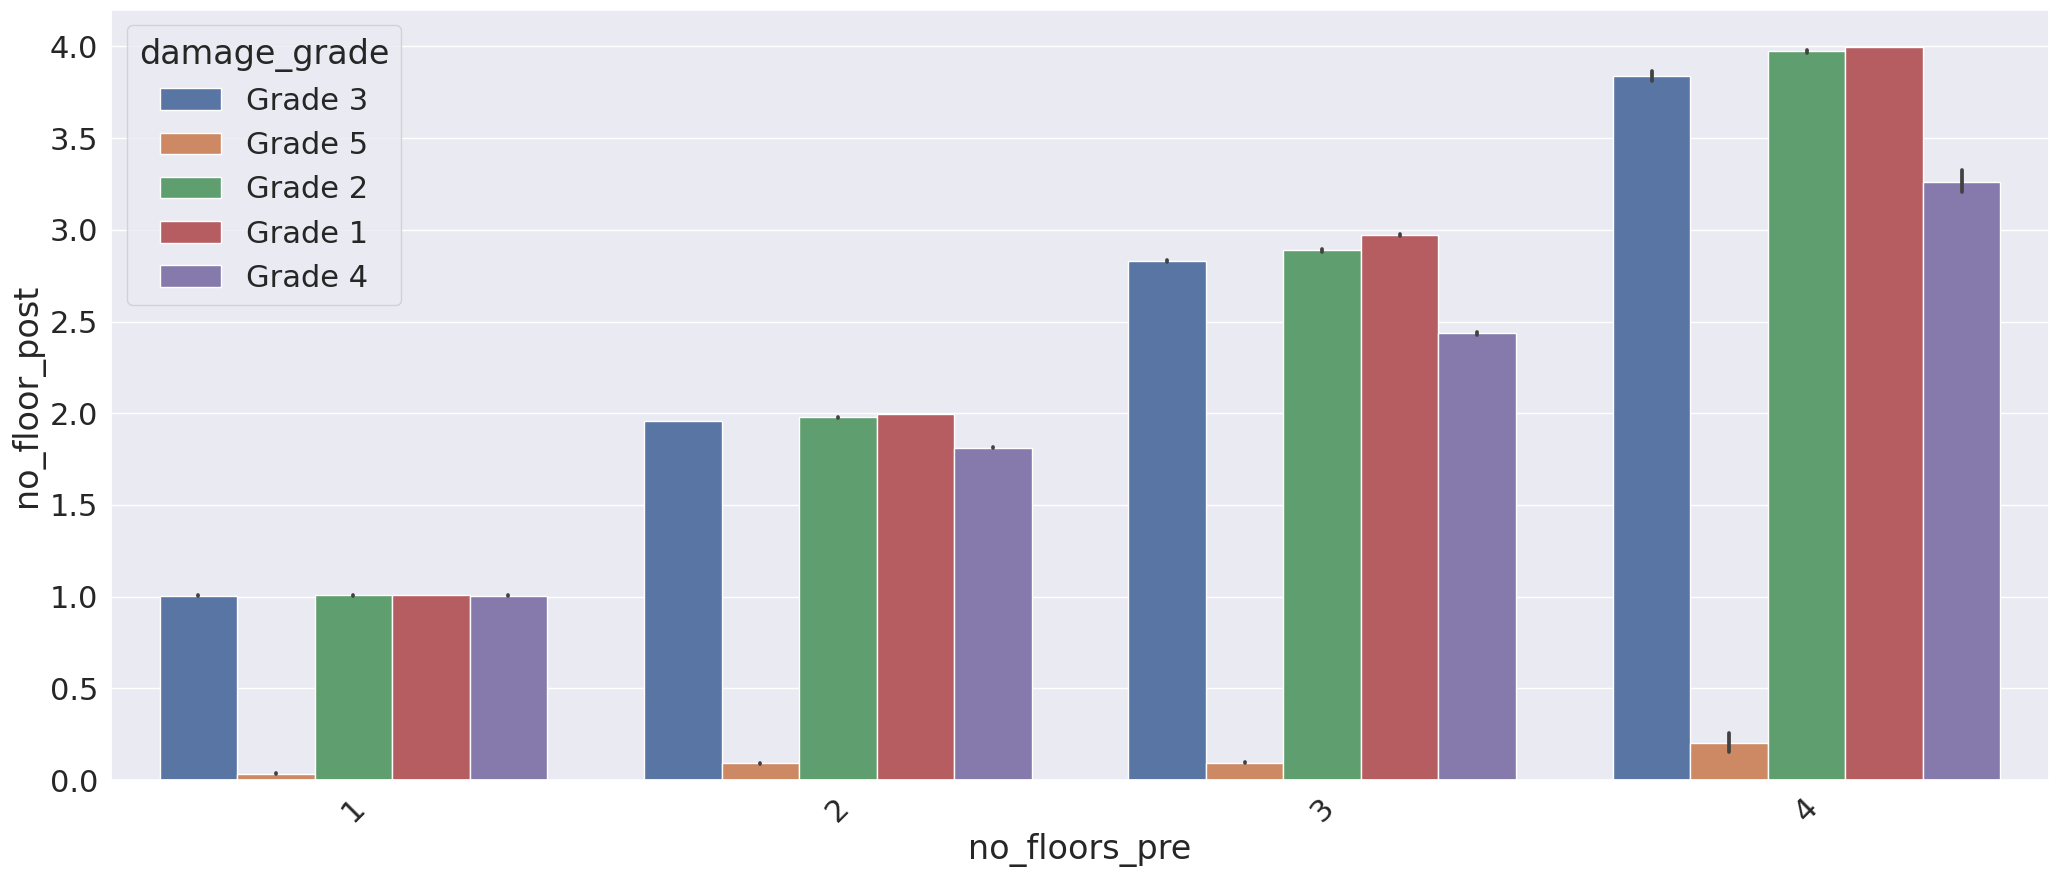

In [104]:
plt.figure(figsize=[25,10])
sns.barplot(x='no_floors_pre',y='no_floor_post',data=final_df,hue='damage_grade')
plt.xticks(rotation=45);
plt.savefig('tec_solution.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')

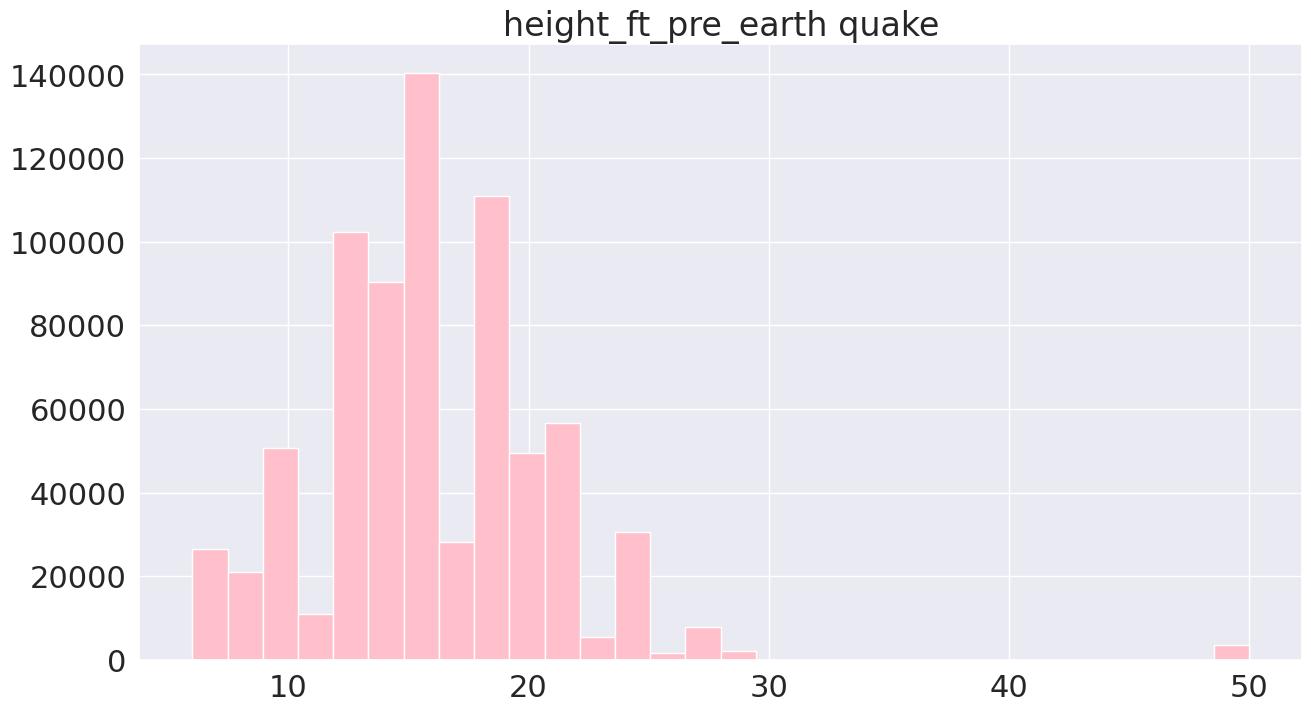

In [105]:
plt.hist(final_df['height_ft_pre_eq'], bins=30,color='pink',)
plt.title('height_ft_pre_earth quake')
plt.savefig('height_ft_pre_eq.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')
plt.show()

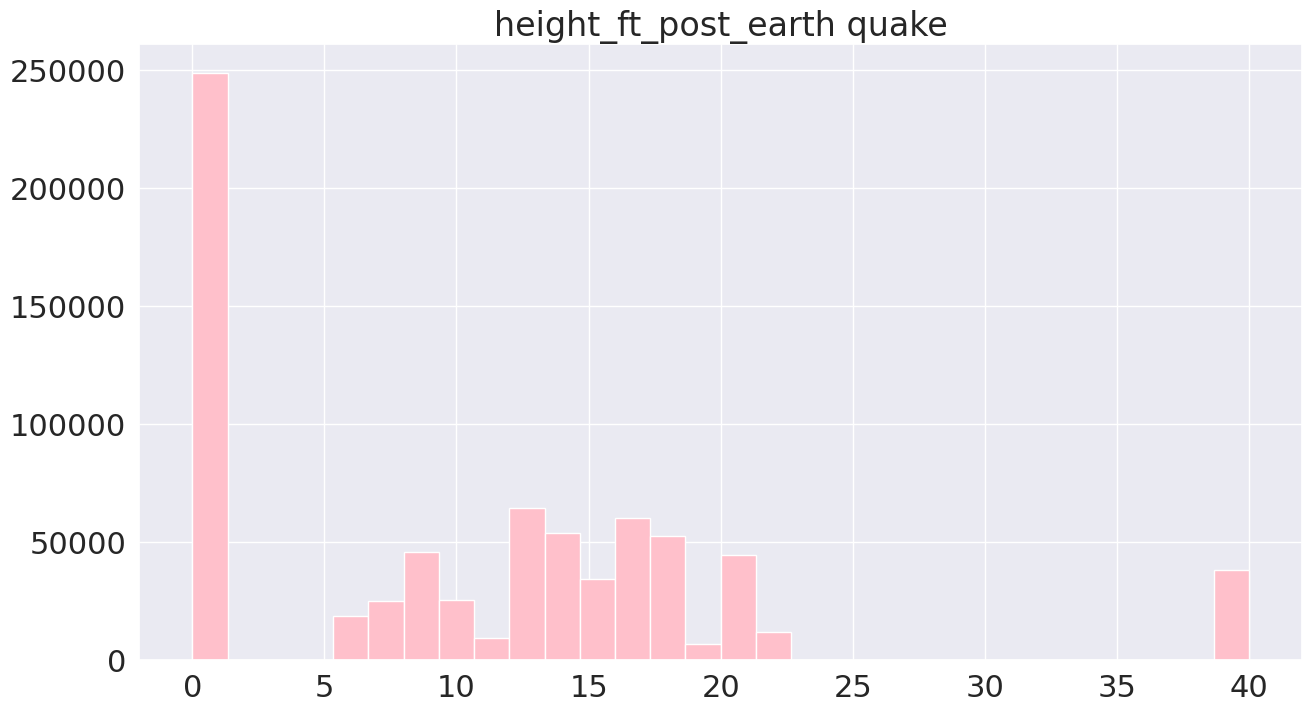

In [106]:
plt.hist(final_df['height_ft_post_eq'], bins=30,color='pink',)
plt.title('height_ft_post_earth quake')
plt.savefig('height_ft_post_eq.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')
plt.show()

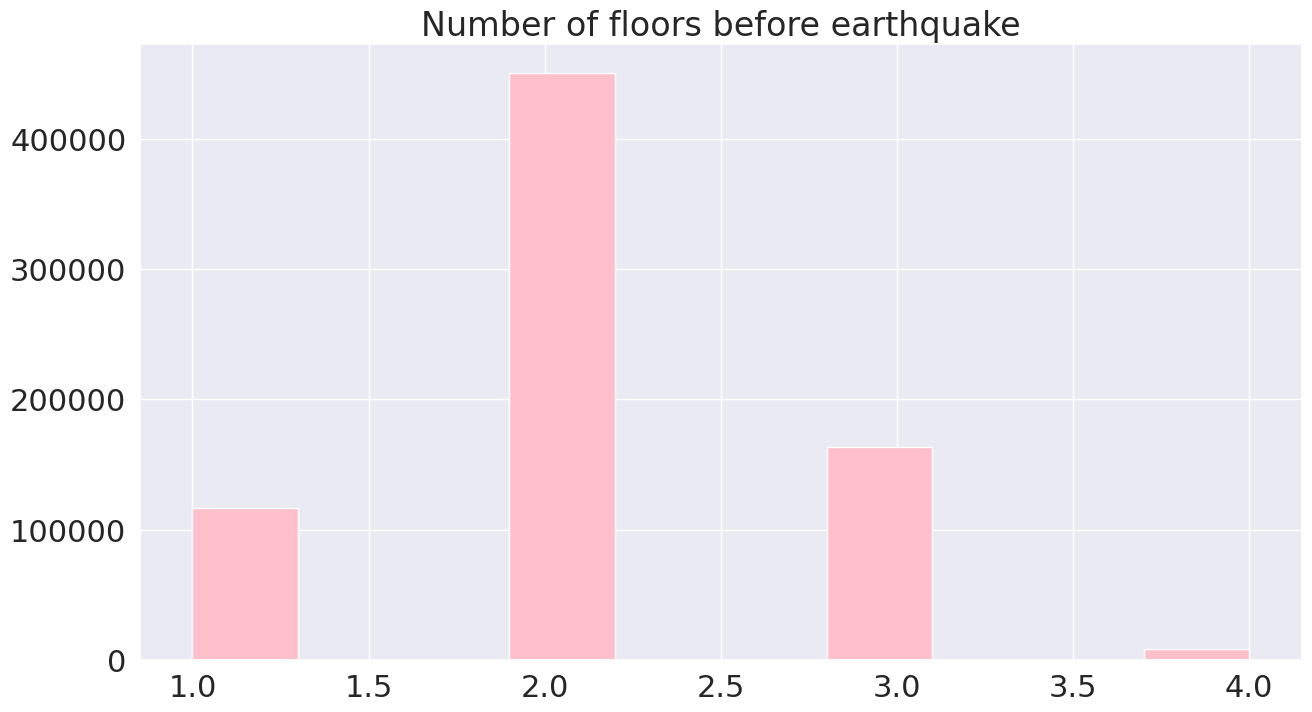

In [107]:
plt.hist(final_df['no_floors_pre'], bins=10,color='pink',)
plt.title('Number of floors before earthquake')
plt.savefig('age.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')
plt.show()

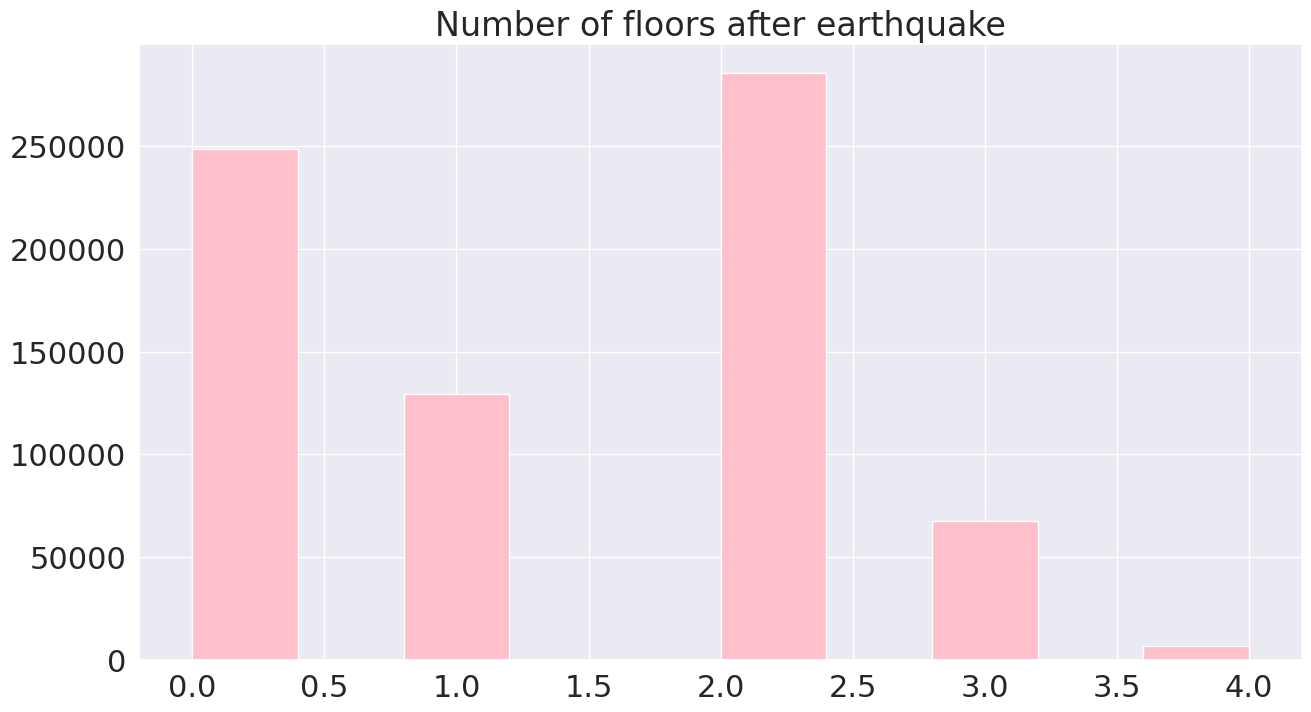

In [108]:
plt.hist(final_df['no_floor_post'], bins=10,color='pink',)
plt.title('Number of floors after earthquake')
plt.savefig('age.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')
plt.show()

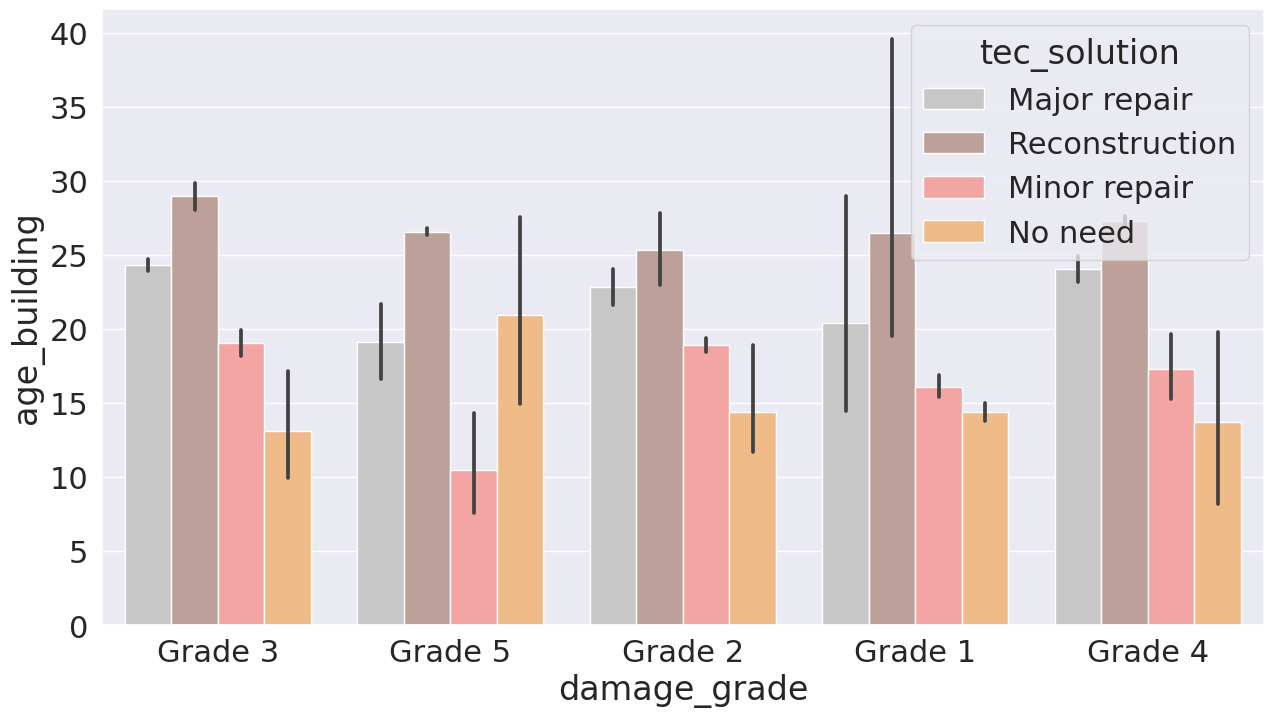

In [109]:
sns.barplot(x=final_df['damage_grade'],y=final_df['age_building'],hue=final_df['tec_solution'],palette='tab20_r')
plt.savefig('gripforce.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')

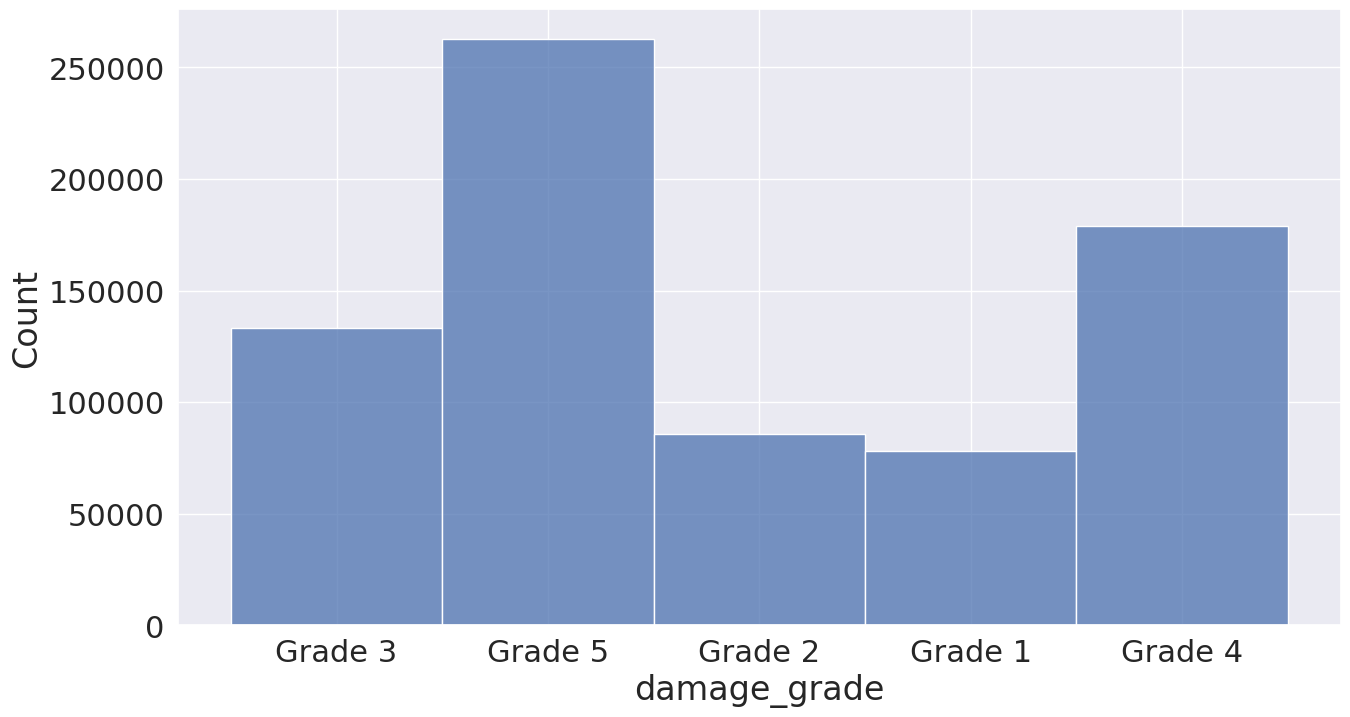

In [110]:
sns.histplot(x='damage_grade',data=final_df)
plt.savefig('hist_damage.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')

# **Detecting outliers**

In [111]:
final_df.columns

Index(['gender', 'age', 'edu_level', 'income', 'bank_acc', 'no_floors_pre',
       'no_floor_post', 'age_building', 'height_ft_pre_eq',
       'height_ft_post_eq', 'land_surface_condition', 'foundation_type',
       'plan_configuration', 'damage_grade', 'tec_solution'],
      dtype='object')

In [112]:
num_cols = final_df.select_dtypes(exclude="object").columns

In [113]:
for col in num_cols:
    outliers_indicies = detect_outliers(final_df,0,[col])

In [114]:
len(outliers_indicies)

0

In [115]:
final_df.drop(outliers_indicies,inplace=True)

In [116]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738542 entries, 0 to 747136
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gender                  738542 non-null  object 
 1   age                     738542 non-null  int64  
 2   edu_level               738542 non-null  object 
 3   income                  738542 non-null  object 
 4   bank_acc                738542 non-null  float64
 5   no_floors_pre           738542 non-null  int64  
 6   no_floor_post           738542 non-null  int64  
 7   age_building            738542 non-null  int64  
 8   height_ft_pre_eq        738542 non-null  float64
 9   height_ft_post_eq       738542 non-null  int64  
 10  land_surface_condition  738542 non-null  object 
 11  foundation_type         738542 non-null  object 
 12  plan_configuration      738542 non-null  object 
 13  damage_grade            738542 non-null  object 
 14  tec_solution        

In [117]:
#final_df.drop('edu_level',axis=1,inplace=True)

# Encoding 

In [118]:
mapping={'Grade 1':1,'Grade 2':2,'Grade 3':3,'Grade 4':4,'Grade 5':5}

In [119]:
final_df['damage_grade'] = final_df['damage_grade'].map(mapping)

**split the data X,y** 

In [120]:
X=final_df.drop('damage_grade',axis=1)
y=final_df['damage_grade']

In [121]:
X.isna().sum()

gender                    0
age                       0
edu_level                 0
income                    0
bank_acc                  0
no_floors_pre             0
no_floor_post             0
age_building              0
height_ft_pre_eq          0
height_ft_post_eq         0
land_surface_condition    0
foundation_type           0
plan_configuration        0
tec_solution              0
dtype: int64

In [122]:
y

0         3
1         5
2         2
3         2
4         1
         ..
747132    5
747133    5
747134    5
747135    5
747136    5
Name: damage_grade, Length: 738542, dtype: int64

# **handeling categorical Data**

In [123]:
X = pd.get_dummies(X,drop_first= True)

In [124]:
X

,age,bank_acc,no_floors_pre,no_floor_post,age_building,height_ft_pre_eq,height_ft_post_eq,gender_Male,edu_level_Class 1,edu_level_Class 10,...,income_ 50,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Brick,foundation_type_Rc,plan_configuration_Square,plan_configuration_T-shape,tec_solution_Minor repair,tec_solution_No need,tec_solution_Reconstruction
0,35,0.000,1,1,9,9.000,9,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,20,0.000,1,1,15,9.000,9,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,20,0.000,1,1,20,9.000,9,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,50,0.000,1,1,20,9.000,9,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,80,0.000,1,1,30,9.000,9,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747132,50,0.000,2,0,999,20.000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
747133,20,0.000,2,0,8,20.000,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
747134,20,0.000,1,0,999,20.000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
747135,20,0.000,1,0,22,13.000,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


Split the data train ,test

In [125]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Feature selection

Information gain 

In [126]:
from sklearn.feature_selection import mutual_info_classif ,SelectKBest
fs = SelectKBest(mutual_info_classif,k='all')
fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

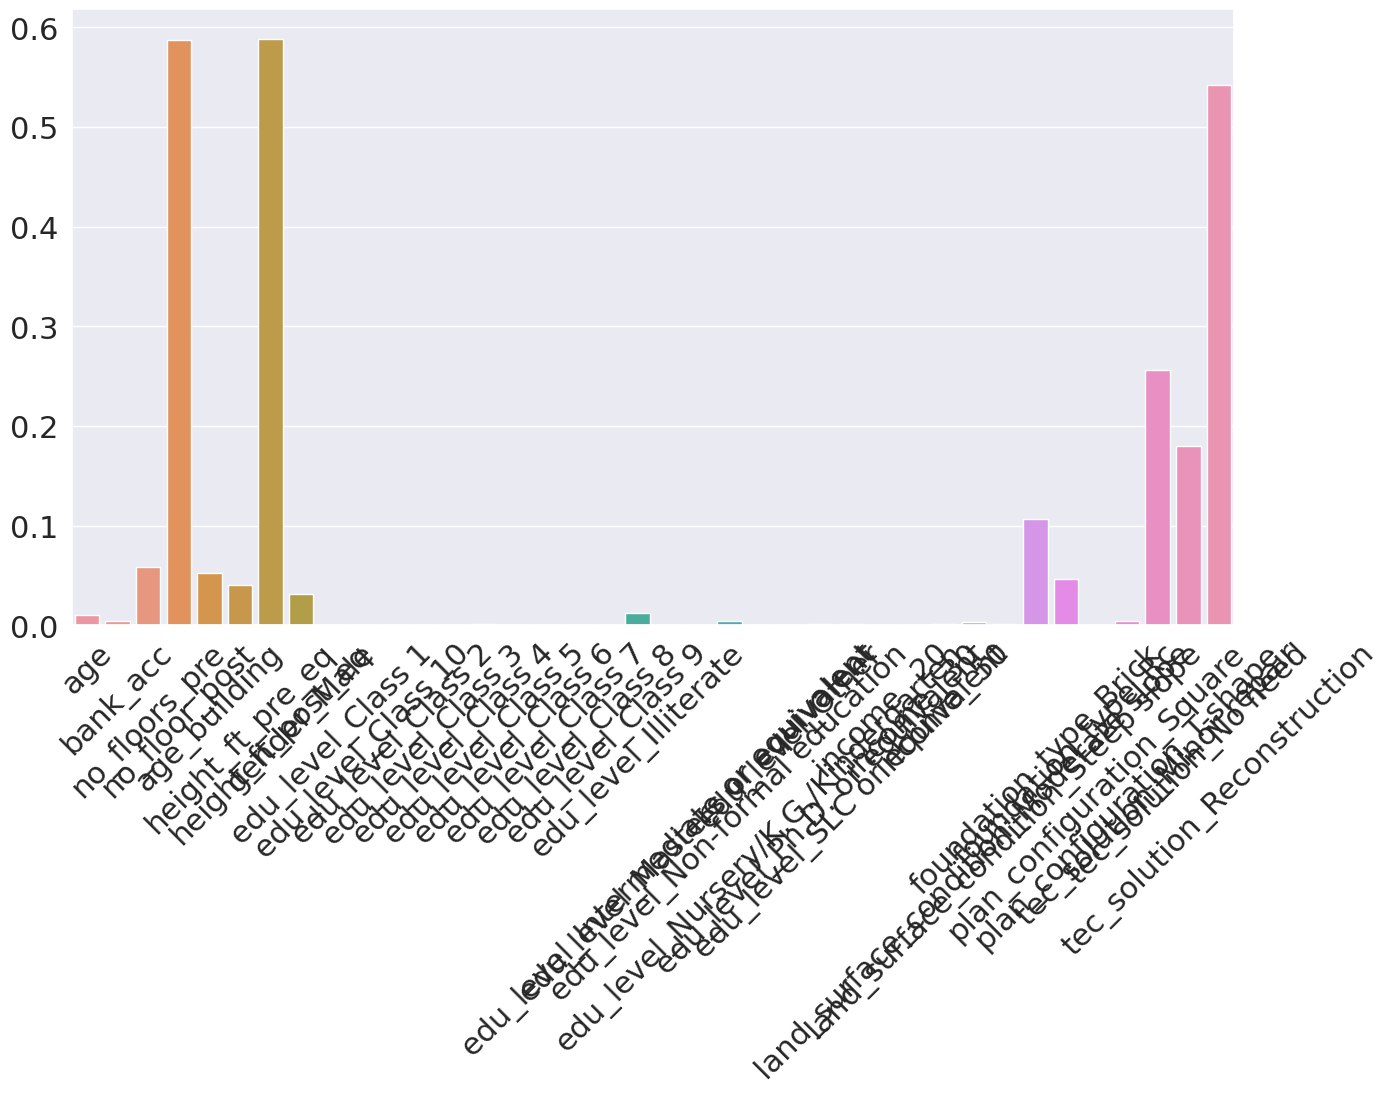

In [127]:
plt.figure(figsize=[15,8])
sns.barplot(x=[i for i in fs.feature_names_in_],y = fs.scores_)
plt.xticks(rotation=45);


In [128]:
x_train_fs = pd.DataFrame(x_train_fs,columns = fs.get_feature_names_out())
x_train_fs

,age,bank_acc,no_floors_pre,no_floor_post,age_building,height_ft_pre_eq,height_ft_post_eq,gender_Male,edu_level_Class 1,edu_level_Class 10,...,income_ 50,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Brick,foundation_type_Rc,plan_configuration_Square,plan_configuration_T-shape,tec_solution_Minor repair,tec_solution_No need,tec_solution_Reconstruction
0,50.000,0.000,2.000,2.000,14.000,22.000,22.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
1,50.000,0.000,2.000,0.000,15.000,12.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
2,35.000,0.000,2.000,2.000,2.000,16.000,16.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
3,80.000,0.000,2.000,2.000,2.000,13.000,13.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,50.000,1.000,2.000,2.000,5.000,18.000,18.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590828,50.000,0.000,2.000,2.000,3.000,18.000,18.000,0.000,0.000,0.000,...,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
590829,20.000,0.000,1.000,1.000,50.000,10.000,10.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
590830,50.000,0.000,2.000,2.000,18.000,12.000,12.000,1.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
590831,20.000,0.000,1.000,1.000,4.000,7.000,7.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000


RandomforestClassifier Feature selection

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [130]:
train_im_f =rf.feature_importances_

<Axes: >

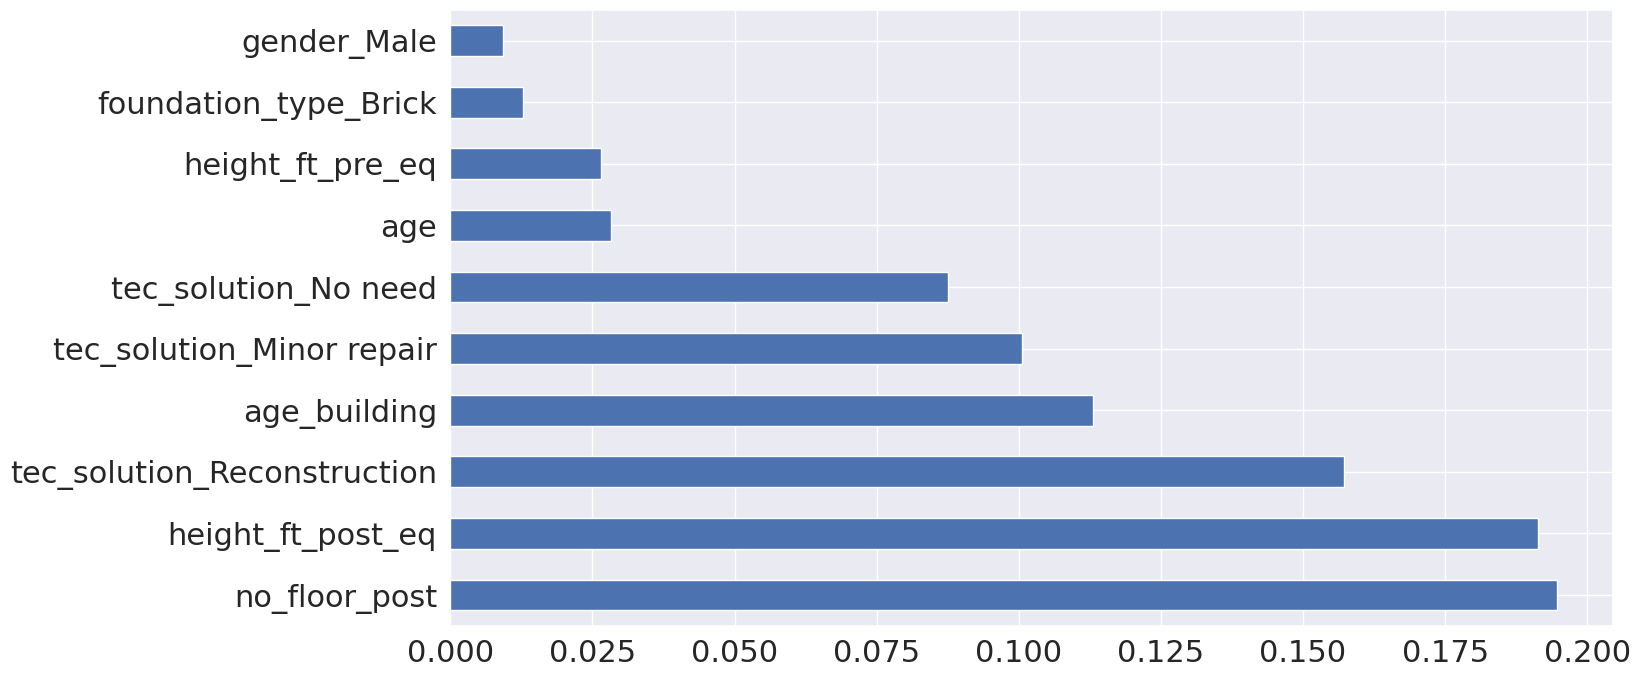

In [131]:
feature_importance = pd.Series(rf.feature_importances_,index=X.columns)
plt.figure(figsize=[15,8])
feature_importance.nlargest(10).plot(kind='barh')
plt.savefig('feature_importance.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')

# **Data Scaling**

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [133]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = sc.get_feature_names_out())
x_train_scaled

,age,bank_acc,no_floors_pre,no_floor_post,age_building,height_ft_pre_eq,height_ft_post_eq,gender_Male,edu_level_Class 1,edu_level_Class 10,...,income_ 50,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Brick,foundation_type_Rc,plan_configuration_Square,plan_configuration_T-shape,tec_solution_Minor repair,tec_solution_No need,tec_solution_Reconstruction
0,0.764,-0.498,-0.134,0.702,-0.159,1.222,1.137,0.688,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,-1.256
1,0.764,-0.498,-0.134,-1.200,-0.143,-0.764,-1.056,0.688,-0.117,-0.183,...,-0.106,2.472,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
2,-0.050,-0.498,-0.134,0.702,-0.343,0.031,0.539,-1.453,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,2.406,-0.273,-1.256
3,2.391,-0.498,-0.134,0.702,-0.343,-0.565,0.240,-1.453,-0.117,-0.183,...,-0.106,-0.404,-0.185,-2.633,-0.227,-0.163,-0.123,-0.416,3.661,-1.256
4,0.764,2.008,-0.134,0.702,-0.297,0.428,0.738,-1.453,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,2.406,-0.273,-1.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590828,0.764,-0.498,-0.134,0.702,-0.328,0.428,0.738,-1.453,-0.117,-0.183,...,-0.106,2.472,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,-1.256
590829,-0.864,-0.498,-1.686,-0.249,0.394,-1.161,-0.059,0.688,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
590830,0.764,-0.498,-0.134,0.702,-0.097,-0.764,0.140,0.688,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
590831,-0.864,-0.498,-1.686,-0.249,-0.312,-1.757,-0.358,-1.453,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,3.661,-1.256


In [134]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns = sc.get_feature_names_out())
x_test_scaled

,age,bank_acc,no_floors_pre,no_floor_post,age_building,height_ft_pre_eq,height_ft_post_eq,gender_Male,edu_level_Class 1,edu_level_Class 10,...,income_ 50,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Brick,foundation_type_Rc,plan_configuration_Square,plan_configuration_T-shape,tec_solution_Minor repair,tec_solution_No need,tec_solution_Reconstruction
0,-0.864,-0.498,1.418,1.653,-0.005,1.620,2.930,0.688,-0.117,5.451,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
1,-0.050,-0.498,1.418,1.653,-0.113,0.825,0.937,0.688,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
2,-0.050,2.008,-0.134,0.702,0.103,-0.367,0.339,0.688,-0.117,-0.183,...,-0.106,2.472,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
3,0.764,-0.498,-0.134,-1.200,0.041,-0.367,-1.056,0.688,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
4,-0.864,-0.498,-0.134,0.702,-0.143,0.031,0.539,-1.453,-0.117,-0.183,...,-0.106,-0.404,-0.185,-2.633,-0.227,-0.163,8.156,2.406,-0.273,-1.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147704,-0.864,-0.498,-0.134,0.702,0.164,0.031,0.539,0.688,-0.117,-0.183,...,-0.106,-0.404,5.397,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
147705,-0.864,-0.498,-1.686,-1.200,-0.066,-1.757,-1.056,-1.453,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796
147706,0.764,-0.498,1.418,1.653,-0.328,1.024,1.037,0.688,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,2.406,-0.273,-1.256
147707,-0.864,-0.498,1.418,1.653,-0.312,2.017,2.930,0.688,-0.117,-0.183,...,-0.106,-0.404,-0.185,0.380,-0.227,-0.163,-0.123,-0.416,-0.273,0.796


# Handeling imbalanced data using under sampling method

In [136]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
x_train_samples , y_train_sampled = sm.fit_resample(x_train_scaled,y_train)

In [137]:
y_train_sampled

0         1
1         1
2         1
3         1
4         1
         ..
311725    5
311726    5
311727    5
311728    5
311729    5
Name: damage_grade, Length: 311730, dtype: int64

In [138]:
y_train_sampled.value_counts()

1    62346
2    62346
3    62346
4    62346
5    62346
Name: damage_grade, dtype: int64

# Modeling 

# **LogisticRegression**

Good results 0.82 on train and test using f1_score

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,lr.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_lr))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


evaluation for training 
               precision    recall  f1-score   support

           1       0.96      0.67      0.79     62346
           2       0.67      0.83      0.74     68450
           3       0.78      0.74      0.76    106587
           4       0.80      0.86      0.83    143110
           5       0.96      0.95      0.96    210340

    accuracy                           0.85    590833
   macro avg       0.83      0.81      0.82    590833
weighted avg       0.86      0.85      0.85    590833

evaluation for testing 
               precision    recall  f1-score   support

           1       0.96      0.67      0.79     15586
           2       0.67      0.83      0.74     17113
           3       0.78      0.74      0.76     26647
           4       0.80      0.86      0.83     35778
           5       0.96      0.96      0.96     52585

    accuracy                           0.85    147709
   macro avg       0.84      0.81      0.82    147709
weighted avg       0.86   

# **KNN **

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,knn.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_knn))

evaluation for training 
               precision    recall  f1-score   support

           1       0.86      0.80      0.83     62346
           2       0.74      0.78      0.76     68450
           3       0.79      0.76      0.77    106587
           4       0.81      0.89      0.85    143110
           5       0.99      0.95      0.97    210340

    accuracy                           0.86    590833
   macro avg       0.84      0.83      0.84    590833
weighted avg       0.87      0.86      0.87    590833

evaluation for testing 
               precision    recall  f1-score   support

           1       0.80      0.74      0.76     15586
           2       0.66      0.70      0.68     17113
           3       0.74      0.71      0.72     26647
           4       0.79      0.85      0.82     35778
           5       0.98      0.95      0.97     52585

    accuracy                           0.83    147709
   macro avg       0.79      0.79      0.79    147709
weighted avg       0.83   

# **Naive_bayes**

Bad results on train and test 0.69

In [141]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
y_pred_nb = nb.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,nb.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_nb))

evaluation for training 
               precision    recall  f1-score   support

           1       0.72      0.73      0.73     62346
           2       0.67      0.72      0.70     68450
           3       0.65      0.20      0.31    106587
           4       0.57      0.75      0.65    143110
           5       0.86      0.96      0.91    210340

    accuracy                           0.72    590833
   macro avg       0.70      0.67      0.66    590833
weighted avg       0.72      0.72      0.69    590833

evaluation for testing 
               precision    recall  f1-score   support

           1       0.72      0.74      0.73     15586
           2       0.67      0.73      0.70     17113
           3       0.64      0.20      0.30     26647
           4       0.57      0.75      0.65     35778
           5       0.86      0.96      0.91     52585

    accuracy                           0.72    147709
   macro avg       0.69      0.67      0.66    147709
weighted avg       0.71   

# **DecisionTreeClassifier**

# **Overfitting **

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
y_pred_dt = dt.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,dt.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_dt))

evaluation for training 
               precision    recall  f1-score   support

           1       0.94      0.95      0.95     62346
           2       0.91      0.92      0.92     68450
           3       0.92      0.92      0.92    106587
           4       0.94      0.95      0.95    143110
           5       1.00      0.98      0.99    210340

    accuracy                           0.95    590833
   macro avg       0.94      0.95      0.94    590833
weighted avg       0.95      0.95      0.95    590833

evaluation for testing 
               precision    recall  f1-score   support

           1       0.73      0.75      0.74     15586
           2       0.59      0.60      0.59     17113
           3       0.64      0.63      0.64     26647
           4       0.76      0.76      0.76     35778
           5       0.96      0.95      0.96     52585

    accuracy                           0.79    147709
   macro avg       0.74      0.74      0.74    147709
weighted avg       0.79   

# **Overfitting**

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,rf.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_rf))

evaluation for training 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95     62346
           2       0.91      0.93      0.92     68450
           3       0.93      0.91      0.92    106587
           4       0.93      0.97      0.95    143110
           5       1.00      0.99      0.99    210340

    accuracy                           0.95    590833
   macro avg       0.95      0.94      0.94    590833
weighted avg       0.96      0.95      0.95    590833

evaluation for testing 
               precision    recall  f1-score   support

           1       0.83      0.72      0.77     15586
           2       0.66      0.71      0.68     17113
           3       0.73      0.70      0.71     26647
           4       0.78      0.86      0.82     35778
           5       0.99      0.95      0.97     52585

    accuracy                           0.83    147709
   macro avg       0.80      0.79      0.79    147709
weighted avg       0.84   

# **cross validation **

# **Logistic Regression**

# **I used in Cross validation some evaluation metrics more sutable with multiclass classification problem ('recall_macro' ,'precision_macro' ,'f1_macro')**

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
lr = LogisticRegression()

scores = cross_validate(lr,X,y,cv=10,return_train_score=True,scoring = ('recall_macro','precision_macro','f1_macro'),n_jobs=-1)

In [145]:
scores

{'fit_time': array([48.11574149, 47.18379402, 47.38888335, 48.18345094, 62.10038543,
        61.94365478, 42.09522557, 40.81029201, 36.97226453, 39.62438583]),
 'score_time': array([0.27172852, 0.28410578, 0.12099004, 0.20084095, 0.28061652,
        0.28960228, 0.1374464 , 0.10896277, 0.26399183, 0.09765911]),
 'test_recall_macro': array([0.76651114, 0.8496679 , 0.79969862, 0.78828447, 0.77965101,
        0.7650223 , 0.79427283, 0.81381825, 0.80172533, 0.78698501]),
 'train_recall_macro': array([0.77420836, 0.7945008 , 0.80146352, 0.80161013, 0.80271702,
        0.80220822, 0.80070035, 0.79905068, 0.79833175, 0.80283878]),
 'test_precision_macro': array([0.80977613, 0.85065412, 0.83879372, 0.81858764, 0.82014404,
        0.79371604, 0.81839837, 0.83694945, 0.8113365 , 0.81478444]),
 'train_precision_macro': array([0.79379427, 0.81727576, 0.82633521, 0.83016857, 0.82711844,
        0.82328309, 0.82581777, 0.82235668, 0.82167057, 0.82938416]),
 'test_f1_macro': array([0.76775562, 0.84710

In [146]:
scores['train_recall_macro'].mean()

0.797762960386118

In [147]:
scores['test_recall_macro'].mean()

0.7945636853505184

In [148]:
y_pred = cross_val_predict(lr,X,y,cv=10,n_jobs=-1)
y_pred

array([1, 4, 2, ..., 5, 5, 5])

# **DecisionTree**

# **The best model accuracy after using cross validation technique Overfitting is handeled **  0.94 for train and test 

In [149]:
dt = DecisionTreeClassifier()
scores_dt = cross_validate(dt,X,y,cv=10,return_train_score=True,scoring = ('recall_macro','precision_macro','f1_macro'),n_jobs=-1)

In [150]:
scores_dt

{'fit_time': array([7.72505903, 8.17770529, 8.66605067, 8.83614182, 6.32995558,
        6.7886734 , 8.81847072, 8.55973125, 7.08274937, 8.85148239]),
 'score_time': array([0.16067696, 0.1402266 , 0.19340849, 0.15489268, 0.13948011,
        0.15304518, 0.14656997, 0.14542675, 0.15502191, 0.22594261]),
 'test_recall_macro': array([0.7345638 , 0.7471552 , 0.72473913, 0.73377023, 0.71636082,
        0.70698571, 0.72265541, 0.72286261, 0.72261385, 0.71026473]),
 'train_recall_macro': array([0.94497373, 0.94312196, 0.94580547, 0.94263339, 0.94402803,
        0.94461107, 0.94336032, 0.94452177, 0.94507606, 0.94454975]),
 'test_precision_macro': array([0.73958806, 0.73337378, 0.7287962 , 0.73230758, 0.72320913,
        0.70890574, 0.72247207, 0.71767779, 0.71274741, 0.70986621]),
 'train_precision_macro': array([0.94100895, 0.93906563, 0.94167875, 0.93857408, 0.93988843,
        0.94060977, 0.93936366, 0.9405835 , 0.94150393, 0.94055703]),
 'test_f1_macro': array([0.73569866, 0.73903343, 0.726

In [151]:
scores_dt['train_f1_macro'].mean()

0.9422343268310529

In [152]:
scores_dt['train_f1_macro'].mean()

0.9422343268310529

In [153]:
y_pred = cross_val_predict(dt,X,y,cv=10,n_jobs=-1)
y_pred

array([3, 3, 2, ..., 5, 5, 5])

# **RandomForest**

Evalute less than Decisiontree bad results 0.84 after using cross valiadtion

In [154]:
rf = RandomForestClassifier(n_estimators=150,max_depth=10)
scores_rf = cross_validate(rf,X,y,cv=5,return_train_score=True,scoring = ('recall_macro','precision_macro','f1_macro'),n_jobs=-1)

In [155]:
scores_rf

{'fit_time': array([116.77657652, 115.27999783,  96.22570062,  90.77501369,
         56.78348851]),
 'score_time': array([5.0211072 , 5.57107735, 5.35014153, 3.48583746, 3.17887497]),
 'test_recall_macro': array([0.84039835, 0.82221554, 0.7958595 , 0.82624232, 0.80448058]),
 'train_recall_macro': array([0.81342147, 0.81767515, 0.82524294, 0.81769829, 0.82246255]),
 'test_precision_macro': array([0.85822003, 0.85366757, 0.83009343, 0.8553876 , 0.8307889 ]),
 'train_precision_macro': array([0.8445382 , 0.84542435, 0.84927868, 0.84510183, 0.85159662]),
 'test_f1_macro': array([0.84311335, 0.82728481, 0.80321501, 0.82915744, 0.80638655]),
 'train_f1_macro': array([0.81780903, 0.8215225 , 0.82842601, 0.8222601 , 0.82719396])}

In [156]:
scores_rf['train_precision_macro'].mean()

0.8471879364313866

In [157]:
scores_rf['test_precision_macro'].mean()

0.8456315054390586

In [158]:
y_pred = cross_val_predict(rf,X,y,cv=10,n_jobs=-1)
y_pred

array([3, 4, 2, ..., 5, 5, 5])

# **Hyper Parameter Tuning**

# **RandomSearch**

In [159]:
from sklearn.model_selection import RandomizedSearchCV

parameters_rf = {'n_estimators':[100,250],
                'criterion':['gini','entropy'],
                 'max_depth':[4,6,8]
}
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator =rf,param_distributions=parameters_rf,cv=3,scoring='recall_macro',n_jobs=-1)
random_search.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [100, 250]},
                   scoring='recall_macro')

In [160]:
random_search.best_score_

0.8172092312802631

In [161]:
random_search.best_params_

{'n_estimators': 250, 'max_depth': 8, 'criterion': 'entropy'}

In [162]:
parameters_dt = {
                'criterion':['gini','entropy'],
                 'max_depth':range(4,10)
                 
              }

dt = DecisionTreeClassifier()
random_search_dt = RandomizedSearchCV(estimator =dt,param_distributions=parameters_dt,cv=5,scoring='recall_macro',n_jobs=-1)
random_search_dt.fit(X,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(4, 10)},
                   scoring='recall_macro')

In [163]:
random_search_dt.best_score_

0.8185473024369394

In [164]:
random_search_dt.best_params_

{'max_depth': 5, 'criterion': 'entropy'}

In [165]:
random_search_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# **Handling overfitting by hyperparameter tunning**

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 4, criterion='entropy')
dt.fit(x_train_scaled,y_train)
y_pred_dt = dt.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,dt.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_dt))

evaluation for training 
               precision    recall  f1-score   support

           1       0.99      0.65      0.78     62346
           2       0.67      0.85      0.75     68450
           3       0.78      0.74      0.76    106587
           4       0.80      0.90      0.85    143110
           5       1.00      0.95      0.97    210340

    accuracy                           0.86    590833
   macro avg       0.85      0.82      0.82    590833
weighted avg       0.87      0.86      0.86    590833

evaluation for testing 
               precision    recall  f1-score   support

           1       0.99      0.65      0.79     15586
           2       0.67      0.85      0.75     17113
           3       0.78      0.74      0.76     26647
           4       0.80      0.91      0.85     35778
           5       1.00      0.95      0.97     52585

    accuracy                           0.86    147709
   macro avg       0.85      0.82      0.82    147709
weighted avg       0.87   

# **Handling overfitting by hyperparameter tunning**

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth= 4, criterion= 'entropy')
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,rf.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_rf))

evaluation for training 
               precision    recall  f1-score   support

           1       0.92      0.65      0.76     62346
           2       0.67      0.85      0.75     68450
           3       0.78      0.72      0.75    106587
           4       0.80      0.90      0.85    143110
           5       1.00      0.95      0.97    210340

    accuracy                           0.85    590833
   macro avg       0.83      0.81      0.82    590833
weighted avg       0.86      0.85      0.85    590833

evaluation for testing 
               precision    recall  f1-score   support

           1       0.92      0.65      0.76     15586
           2       0.67      0.85      0.75     17113
           3       0.79      0.72      0.75     26647
           4       0.80      0.91      0.85     35778
           5       1.00      0.95      0.97     52585

    accuracy                           0.85    147709
   macro avg       0.84      0.82      0.82    147709
weighted avg       0.87   

## **Pipeline**

In [168]:
df_pipline=pd.read_csv('/content/final_df_pipeline_data.csv',index_col='Unnamed: 0')

In [169]:
df_pipline

,gender,age,edu_level,income,bank_acc,no_floors_pre,no_floor_post,age_building,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,plan_configuration,damage_grade,tec_solution
0,Male,35,Illiterate,10,0.000,1,1,9,9.000,9,Flat,Rc,Rectangular,Grade 3,Major repair
1,Female,20,Illiterate,10,0.000,1,1,15,9.000,9,Flat,Rc,Rectangular,Grade 5,Reconstruction
2,Male,20,Illiterate,10,0.000,1,1,20,9.000,9,Flat,Rc,Rectangular,Grade 2,Minor repair
3,Male,50,Illiterate,10,0.000,1,1,20,9.000,9,Flat,Rc,Rectangular,Grade 2,Minor repair
4,Male,80,Illiterate,10,0.000,1,1,30,9.000,9,Flat,Rc,Rectangular,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747132,Female,50,Illiterate,10,0.000,2,0,999,20.000,0,Flat,Brick,Rectangular,Grade 5,Reconstruction
747133,Male,20,Class 10,10,0.000,2,0,8,20.000,0,Flat,Brick,Rectangular,Grade 5,Reconstruction
747134,Male,20,Class 5,10,0.000,1,0,999,20.000,0,Flat,Brick,Rectangular,Grade 5,Reconstruction
747135,Female,20,Illiterate,10,0.000,1,0,22,13.000,0,Moderate slope,Brick,Rectangular,Grade 5,Reconstruction


In [170]:
X=df_pipline.drop('damage_grade',axis=1)
y=df_pipline['damage_grade']

In [171]:
X

,gender,age,edu_level,income,bank_acc,no_floors_pre,no_floor_post,age_building,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,plan_configuration,tec_solution
0,Male,35,Illiterate,10,0.000,1,1,9,9.000,9,Flat,Rc,Rectangular,Major repair
1,Female,20,Illiterate,10,0.000,1,1,15,9.000,9,Flat,Rc,Rectangular,Reconstruction
2,Male,20,Illiterate,10,0.000,1,1,20,9.000,9,Flat,Rc,Rectangular,Minor repair
3,Male,50,Illiterate,10,0.000,1,1,20,9.000,9,Flat,Rc,Rectangular,Minor repair
4,Male,80,Illiterate,10,0.000,1,1,30,9.000,9,Flat,Rc,Rectangular,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747132,Female,50,Illiterate,10,0.000,2,0,999,20.000,0,Flat,Brick,Rectangular,Reconstruction
747133,Male,20,Class 10,10,0.000,2,0,8,20.000,0,Flat,Brick,Rectangular,Reconstruction
747134,Male,20,Class 5,10,0.000,1,0,999,20.000,0,Flat,Brick,Rectangular,Reconstruction
747135,Female,20,Illiterate,10,0.000,1,0,22,13.000,0,Moderate slope,Brick,Rectangular,Reconstruction


In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
x_train,x_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [174]:
numeric_columns = x_train.select_dtypes(exclude='object').columns

In [175]:
categorical_columns = x_train.select_dtypes(include='object').columns

In [176]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
numerical_features = Pipeline(steps=[('handeling missing values',SimpleImputer(strategy='median')),('scaling',StandardScaler(with_mean=False))])

In [177]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = Pipeline(steps=[('handeling missing values',SimpleImputer(strategy='most_frequent')),
                                      ('handle cat features',OneHotEncoder(drop='first')),('scaling',StandardScaler(with_mean=False))])

In [178]:
categorical_features

Pipeline(steps=[('handeling missing values',
                 SimpleImputer(strategy='most_frequent')),
                ('handle cat features', OneHotEncoder(drop='first')),
                ('scaling', StandardScaler(with_mean=False))])

In [179]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[('numeric',numerical_features,numeric_columns),('categorical',categorical_features,categorical_columns)],remainder='passthrough')

In [180]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('handeling missing values',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['age', 'income', 'bank_acc', 'no_floors_pre', 'no_floor_post',
       'age_building', 'height_ft_pre_eq', 'height_ft_post_eq'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handeling missing values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('handle cat features',
                                                  OneHotEncoder(drop='first')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['gender', 'edu_level', 'land_surface_condition', 'foundation_type',
       'plan_configuration', 'tec_solution'],
      dtype='object'))])

In [181]:
final_pipline = Pipeline(steps=[('preprocessing',preprocessing),('modeling',DecisionTreeClassifier(max_depth= 4, criterion='entropy'))])

In [182]:
final_pipline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('handeling '
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['age', 'income', 'bank_acc', 'no_floors_pre', 'no_floor_post',
       'age_building', 'height_ft_pre_eq', 'height_ft_post_eq'],
      dtyp...
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('handle cat '
                                                                   'features',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['gender', 'edu_level', 'land_surface_condition', 'foundation_type',
       'plan_configuration', 'tec_solution'],
      dtype='object'))])),
                ('modeling',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [183]:
final_pipline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('handeling '
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['age', 'income', 'bank_acc', 'no_floors_pre', 'no_floor_post',
       'age_building', 'height_ft_pre_eq', 'height_ft_post_eq'],
      dtyp...
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('handle cat '
                                                                   'features',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['gender', 'edu_level', 'land_surface_condition', 'foundation_type',
       'plan_configuration', 'tec_solution'],
      dtype='object'))])),
                ('modeling',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [184]:
final_pipline.predict(x_test)

array(['Grade 4', 'Grade 4', 'Grade 4', ..., 'Grade 2', 'Grade 4',
       'Grade 2'], dtype=object)

# **Saving the pkl file **

In [185]:
import joblib
joblib.dump(final_pipline,'final_model_pipeline_test.pkl')

['final_model_pipeline_test.pkl']

In [186]:
model = joblib.load('final_model_pipeline_test.pkl')

# **Deployment** 

I did it on Jupeter notbook 
# let me show you another screen !!! 